In [22]:
import pandas as pd
import random as random
import datetime
import numpy as np
import gzip
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calplot
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data


In [23]:
timeval = ['time', 'value']
#files = ['data/heatpump_temperature_1.csv.gz', 'data/heatpump_temperature_2.csv.gz', 'data/heatpump_temperature_3.csv.gz', 'data/heatpump_temperature_4.csv.gz', 'data/heatpump_temperature_5.csv.gz', 'data/heatpump_temperature_6.csv.gz', 'data/heatpump_return_external.csv.gz', 'data/heatpump_hot_gas.csv.gz',  'data/heatpump_probe_in.csv.gz', 'data/heatpump_mk1.csv.gz', 'data/heatpump_starts_compressor1.csv.gz', 'data/heatpump_state.csv.gz', 'data/heatpump_extended_state.csv.gz']
#cols = ['outside', 'return', 'reference_return', 'supply', 'servicewater_reference', 'servicewater', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'starts_compressor1', 'state', 'extended_state']

files = ['data/heatpump_temperature_1.csv.gz', 'data/heatpump_temperature_2.csv.gz', 'data/heatpump_temperature_3.csv.gz', 'data/heatpump_temperature_4.csv.gz', 'data/heatpump_temperature_5.csv.gz', 'data/heatpump_temperature_6.csv.gz', 'data/heatpump_return_external.csv.gz', 'data/heatpump_hot_gas.csv.gz',  'data/heatpump_probe_in.csv.gz', 'data/heatpump_mk1.csv.gz', 'data/heatpump_state.csv.gz', 'data/heatpump_extended_state.csv.gz']
cols = ['outside', 'return', 'reference_return', 'supply', 'servicewater_reference', 'servicewater', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'state', 'extended_state']

state_converter = lambda x: (sys.intern(x.split(":")[0]))
converters = {'data/heatpump_state.csv.gz': state_converter, 'data/heatpump_extended_state.csv.gz': state_converter}
#merged_df = pd.DataFrame({'time': pd.date_range(pd.to_datetime('2016-01-16'), pd.to_datetime('2020-12-25'),freq='1m')})
#merged_df = pd.DataFrame({'time': pd.date_range(pd.to_datetime('2020-12-20'), pd.to_datetime('2020-12-21'),freq='1m')})
merged_df = pd.DataFrame()

for i, file in enumerate(files):
    print(file)
    with gzip.open(file, "rb") as f:
        df = pd.read_csv(f, sep=';', parse_dates=True, index_col=timeval[0], names=timeval, converters={timeval[1]: converters.get(file)})


    #df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S') # see parse_dates = True above
    df['value'] = pd.arrays.SparseArray(df['value'].values) # , dtype=df['value'].dtype)

    # Remove all "duplicates" during time. This is esp. useful for state and extended_state which would otherwise use a huge amount of memory.
    df = df[~(df[['value']] == df[['value']].shift()).all(axis=1)]

    # Rename column to actual name
    df.rename(columns={"value": cols[i]}, inplace=True)

    print(df)
    df.info(verbose=False)

#    if i == 0:
#        merged_df = df
#    else:
#       merged_df = pd.merge_asof(merged_df.sort_values('time'), df, on='time', tolerance=pd.Timedelta("1m"))
    merged_df = merged_df.merge(df, how='outer', left_index=True, right_index=True)
    #print('df_merged memory usage : {}'.format(merged_df.memory_usage()/1000))

#merged_df.set_index('time', inplace=True)


data/heatpump_temperature_1.csv.gz
                     outside
time                        
2016-01-16 14:35:50     13.8
2016-01-16 14:36:00     13.9
2016-01-16 14:36:50     13.8
2016-01-16 14:37:01     13.9
2016-01-16 14:37:51     13.8
...                      ...
2020-12-24 22:57:30     11.9
2020-12-24 23:03:14     12.0
2020-12-24 23:03:24     11.9
2020-12-24 23:05:35     12.0
2020-12-24 23:05:45     11.9

[2070634 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070634 entries, 2016-01-16 14:35:50 to 2020-12-24 23:05:45
Columns: 1 entries, outside to outside
dtypes: Sparse[float64, nan](1)
memory usage: 39.5 MB
data/heatpump_temperature_2.csv.gz
                     return
time                       
2016-01-16 14:36:20    28.9
2016-01-16 14:36:30    28.8
2016-01-16 14:36:40    28.9
2016-01-16 14:44:34    28.8
2016-01-16 14:44:45    28.7
...                     ...
2020-12-25 01:02:01    21.4
2020-12-25 01:02:11    21.3
2020-12-25 01:04:12    21.4
2020-12-25 

In [24]:

display(merged_df)
merged_df.info(verbose=False)



outside  return  reference_return  supply  \
time                                                             
2016-01-16 14:35:50     13.8     NaN               NaN    34.0   
2016-01-16 14:36:00     13.9     NaN               NaN    34.1   
2016-01-16 14:36:10      NaN     NaN               NaN    34.2   
2016-01-16 14:36:20      NaN    28.9               NaN     NaN   
2016-01-16 14:36:30      NaN    28.8               NaN    34.3   
...                      ...     ...               ...     ...   
2020-12-25 01:04:22      NaN     NaN               NaN    20.7   
2020-12-25 01:04:32      NaN    21.5               NaN    21.1   
2020-12-25 01:04:42      NaN     NaN               NaN    21.3   
2020-12-25 01:04:52      NaN    21.6               NaN    21.4   
2020-12-25 01:05:02      NaN     NaN               NaN    21.5   

                     servicewater_reference  servicewater  return_external  \
time                                                                         
2016-01-16 14:35:50                     NaN           NaN              NaN   
2016-01-16 14:36:00                     NaN          38.5              NaN   
2016-01-16 14:36:10                     NaN          38.6              NaN   
2016-01-16 14:36:20                     NaN          38.5              NaN   
2016-01-16 14:36:30                     NaN          38.6              NaN   
...                                     ...           ...              ...   
2020-12-25 01:04:22                     NaN           NaN              NaN   
2020-12-25 01:04:32                     NaN           NaN              NaN   
2020-12-25 01:04:42                     NaN           NaN              NaN   
2020-12-25 01:04:52                     NaN           NaN              NaN   
2020-12-25 01:05:02                     NaN           NaN              NaN   

                     hot_gas  probe_in   mk1             state extended_state  
time                                                                           
2016-01-16 14:35:50     60.9       3.7   NaN  Heatpump running        heating  
2016-01-16 14:36:00     61.0       NaN   NaN               NaN            NaN  
2016-01-16 14:36:10      NaN       NaN   NaN               NaN            NaN  
2016-01-16 14:36:20      NaN       NaN   NaN               NaN            NaN  
2016-01-16 14:36:30      NaN       NaN   NaN               NaN            NaN  
...                      ...       ...   ...               ...            ...  
2020-12-25 01:04:22      NaN       NaN  22.1               NaN            NaN  
2020-12-25 01:04:32      NaN       5.3  22.0               NaN            NaN  
2020-12-25 01:04:42      NaN       NaN  21.9               NaN            NaN  
2020-12-25 01:04:52      NaN       NaN  21.8               NaN            NaN  
2020-12-25 01:05:02      NaN       NaN  21.9               NaN            NaN  

[9178756 rows x 12 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9178756 entries, 2016-01-16 14:35:50 to 2020-12-25 01:05:02
Columns: 12 entries, outside to extended_state
dtypes: Sparse[float64, nan](10), Sparse[object, nan](2)
memory usage: 234.2 MB


In [25]:
dummies_state = pd.get_dummies(merged_df['state'], sparse=False, prefix='s', dummy_na=True)
dummies_state.loc[dummies_state['s_nan'] == 1, dummies_state.columns] = np.nan

# Convert the dummy columns to sparse and use them in merged_df
merged_df['heatpump_running'] = dummies_state['s_Heatpump running'].astype('Sparse')

# Free some memory
merged_df.drop(columns=['state'], inplace=True)
del dummies_state

dummies_extended_state = pd.get_dummies(merged_df['extended_state'], sparse=False, prefix='es', dummy_na=True)
dummies_extended_state.loc[dummies_extended_state['es_nan'] == 1, dummies_extended_state.columns] = np.nan

# Convert the dummy columns to sparse and use them in merged_df
compressor_heating_s = ((dummies_extended_state['es_compressor heating up'] == 1) | (dummies_extended_state['es_unknown'] == 1)).astype(float)
merged_df['compressor_heating'] = ((compressor_heating_s.loc[compressor_heating_s.shift() != compressor_heating_s])).astype('Sparse')

merged_df['heatpump_heating'] = dummies_extended_state['es_heating'].astype('Sparse')
merged_df['heatpump_servicewater'] = dummies_extended_state['es_service water'].astype('Sparse')
merged_df['defrosting'] = dummies_extended_state['es_defrosting'].astype('Sparse')

# Free some memory
merged_df.drop(columns=['extended_state'], inplace=True)
del dummies_extended_state

display(merged_df)
merged_df.info(verbose=False)



outside  return  reference_return  supply  \
time                                                             
2016-01-16 14:35:50     13.8     NaN               NaN    34.0   
2016-01-16 14:36:00     13.9     NaN               NaN    34.1   
2016-01-16 14:36:10      NaN     NaN               NaN    34.2   
2016-01-16 14:36:20      NaN    28.9               NaN     NaN   
2016-01-16 14:36:30      NaN    28.8               NaN    34.3   
...                      ...     ...               ...     ...   
2020-12-25 01:04:22      NaN     NaN               NaN    20.7   
2020-12-25 01:04:32      NaN    21.5               NaN    21.1   
2020-12-25 01:04:42      NaN     NaN               NaN    21.3   
2020-12-25 01:04:52      NaN    21.6               NaN    21.4   
2020-12-25 01:05:02      NaN     NaN               NaN    21.5   

                     servicewater_reference  servicewater  return_external  \
time                                                                         
2016-01-16 14:35:50                     NaN           NaN              NaN   
2016-01-16 14:36:00                     NaN          38.5              NaN   
2016-01-16 14:36:10                     NaN          38.6              NaN   
2016-01-16 14:36:20                     NaN          38.5              NaN   
2016-01-16 14:36:30                     NaN          38.6              NaN   
...                                     ...           ...              ...   
2020-12-25 01:04:22                     NaN           NaN              NaN   
2020-12-25 01:04:32                     NaN           NaN              NaN   
2020-12-25 01:04:42                     NaN           NaN              NaN   
2020-12-25 01:04:52                     NaN           NaN              NaN   
2020-12-25 01:05:02                     NaN           NaN              NaN   

                     hot_gas  probe_in   mk1  heatpump_running  \
time                                                             
2016-01-16 14:35:50     60.9       3.7   NaN               1.0   
2016-01-16 14:36:00     61.0       NaN   NaN               NaN   
2016-01-16 14:36:10      NaN       NaN   NaN               NaN   
2016-01-16 14:36:20      NaN       NaN   NaN               NaN   
2016-01-16 14:36:30      NaN       NaN   NaN               NaN   
...                      ...       ...   ...               ...   
2020-12-25 01:04:22      NaN       NaN  22.1               NaN   
2020-12-25 01:04:32      NaN       5.3  22.0               NaN   
2020-12-25 01:04:42      NaN       NaN  21.9               NaN   
2020-12-25 01:04:52      NaN       NaN  21.8               NaN   
2020-12-25 01:05:02      NaN       NaN  21.9               NaN   

                     compressor_heating  heatpump_heating  \
time                                                        
2016-01-16 14:35:50                 0.0               1.0   
2016-01-16 14:36:00                 NaN               NaN   
2016-01-16 14:36:10                 NaN               NaN   
2016-01-16 14:36:20                 NaN               NaN   
2016-01-16 14:36:30                 NaN               NaN   
...                                 ...               ...   
2020-12-25 01:04:22                 NaN               NaN   
2020-12-25 01:04:32                 NaN               NaN   
2020-12-25 01:04:42                 NaN               NaN   
2020-12-25 01:04:52                 NaN               NaN   
2020-12-25 01:05:02                 NaN               NaN   

                     heatpump_servicewater  defrosting  
time                                                    
2016-01-16 14:35:50                    0.0         0.0  
2016-01-16 14:36:00                    NaN         NaN  
2016-01-16 14:36:10                    NaN         NaN  
2016-01-16 14:36:20                    NaN         NaN  
2016-01-16 14:36:30                    NaN         NaN  
...                                    ...         ...  
2020-12-25 01:04:22                   

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9178756 entries, 2016-01-16 14:35:50 to 2020-12-25 01:05:02
Columns: 15 entries, outside to defrosting
dtypes: Sparse[float64, nan](15)
memory usage: 236.7 MB


In [26]:
display(merged_df.dtypes)
merged_df.info(verbose=False, memory_usage="deep")

outside                   Sparse[float64, nan]
return                    Sparse[float64, nan]
reference_return          Sparse[float64, nan]
supply                    Sparse[float64, nan]
servicewater_reference    Sparse[float64, nan]
servicewater              Sparse[float64, nan]
return_external           Sparse[float64, nan]
hot_gas                   Sparse[float64, nan]
probe_in                  Sparse[float64, nan]
mk1                       Sparse[float64, nan]
heatpump_running          Sparse[float64, nan]
compressor_heating        Sparse[float64, nan]
heatpump_heating          Sparse[float64, nan]
heatpump_servicewater     Sparse[float64, nan]
defrosting                Sparse[float64, nan]
dtype: object

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9178756 entries, 2016-01-16 14:35:50 to 2020-12-25 01:05:02
Columns: 15 entries, outside to defrosting
dtypes: Sparse[float64, nan](15)
memory usage: 236.7 MB


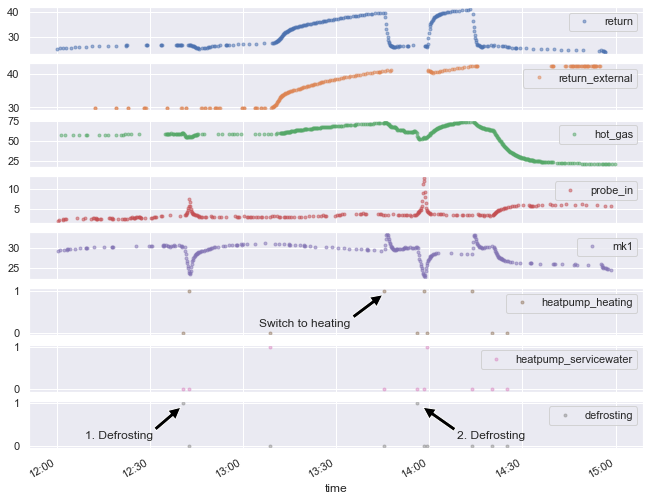

In [27]:

sns.set(rc={'figure.figsize':(20, 15)})

#merged_df[(merged_df.index > '2020-12-10 12:00:00') & (merged_df.index < '2020-12-10 15:00:00')]
df_plot = merged_df['2020-12-10 12:00:00' : '2020-12-10 15:00:00']

cols_plot = ['return', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'heatpump_heating', 'heatpump_servicewater', 'defrosting']
axes = df_plot[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes[::-1]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

#axes[0].annotate('Switch to heating', ha = 'center', va = 'bottom', xytext = (pd.to_datetime('2020-12-10 13:20:00'), 28.0),xy = (pd.to_datetime('2020-12-10 13:45:00'), 35),arrowprops = {'facecolor' : 'black'})
axes[5].annotate('Switch to heating', ha = 'center', va = 'bottom', xytext = (pd.to_datetime('2020-12-10 13:20:00'), 0.1),xy = (pd.to_datetime('2020-12-10 13:45:00'), 0.9),arrowprops = {'facecolor' : 'black'})
axes[7].annotate('1. Defrosting', ha = 'center', va = 'bottom', xytext = (pd.to_datetime('2020-12-10 12:20:00'), 0.1),xy = (pd.to_datetime('2020-12-10 12:40:00'), 0.9),arrowprops = {'facecolor' : 'black'})
axes[7].annotate('2. Defrosting', ha = 'center', va = 'bottom', xytext = (pd.to_datetime('2020-12-10 14:20:00'), 0.1),xy = (pd.to_datetime('2020-12-10 13:58:00'), 0.9),arrowprops = {'facecolor' : 'black'})
plt.gcf().savefig('./gen/defrosting_20201210.png')
plt.show()
#display(df_plot[df_plot['defrosting']==1])


In [28]:
#merged_df['2016-01-16 14:42:00' : '2016-01-16 14:43:00']
merged_df['defrosting'].sum()


1853.0

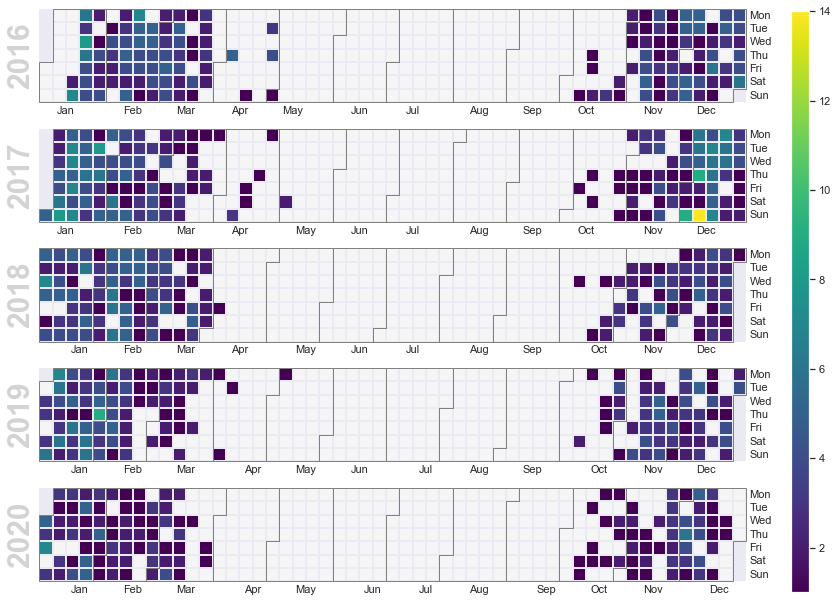

In [29]:
calplot.calplot(merged_df['defrosting'].sparse.to_dense())
plt.gcf().savefig('./gen/overview_defrosting.png')
plt.show()


Resample dataframe to one value every minute. Use mean values if multiple values per minute exists. Use past value if no column value exists for a minute. If no value exists for all columns, no resampled row is generated. All rows with NaNs will be dropped afterwards (e.g. at the beginning).

In [30]:
# Resample sparse df to dense df with 1min mean values
resampled_df = merged_df.sparse.to_dense().ffill().resample('1Min').mean().dropna()

# Reset all "binary" columns to 1 if not 0
resampled_df['compressor_heating'][resampled_df['compressor_heating'] > 0] = 1
resampled_df['heatpump_heating'][resampled_df['heatpump_heating'] > 0] = 1
resampled_df['heatpump_servicewater'][resampled_df['heatpump_servicewater'] > 0] = 1
resampled_df['heatpump_running'][resampled_df['heatpump_running'] > 0] = 1
resampled_df['defrosting'][resampled_df['defrosting'] > 0] = 1

# Normale df to be useable for neural nets
normalized_df=(resampled_df-resampled_df.min())/(resampled_df.max()-resampled_df.min())

display(normalized_df)
normalized_df.info(verbose=False, memory_usage="deep")
display(resampled_df)
resampled_df.info(verbose=False, memory_usage="deep")

outside    return  reference_return    supply  \
time                                                                  
2016-01-17 15:00:00  0.410628  0.308029          0.465385  0.423645   
2016-01-17 15:01:00  0.410628  0.308029          0.465385  0.423416   
2016-01-17 15:02:00  0.410628  0.295620          0.000000  0.433703   
2016-01-17 15:03:00  0.410628  0.246229          0.000000  0.484378   
2016-01-17 15:04:00  0.410628  0.233090          0.000000  0.465328   
...                       ...       ...               ...       ...   
2020-12-25 01:01:00  0.342995  0.093431          0.000000  0.140513   
2020-12-25 01:02:00  0.342995  0.093431          0.000000  0.141084   
2020-12-25 01:03:00  0.342995  0.091971          0.000000  0.139941   
2020-12-25 01:04:00  0.342995  0.096350          0.000000  0.127368   
2020-12-25 01:05:00  0.342995  0.100730          0.000000  0.138798   

                     servicewater_reference  servicewater  return_external  \
time                                                                         
2016-01-17 15:00:00                0.670886      0.534155         0.320755   
2016-01-17 15:01:00                0.670886      0.534155         0.320755   
2016-01-17 15:02:00                0.670886      0.534155         0.322102   
2016-01-17 15:03:00                0.670886      0.534155         0.330638   
2016-01-17 15:04:00                0.632911      0.534155         0.347709   
...                                     ...           ...              ...   
2020-12-25 01:01:00                0.620253      0.534155         0.539084   
2020-12-25 01:02:00                0.620253      0.534155         0.539084   
2020-12-25 01:03:00                0.620253      0.534155         0.539084   
2020-12-25 01:04:00                0.620253      0.534155         0.539084   
2020-12-25 01:05:00                0.620253      0.534155         0.539084   

                      hot_gas  probe_in       mk1  heatpump_running  \
time                                                                  
2016-01-17 15:00:00  0.664200  0.167127  0.438922               1.0   
2016-01-17 15:01:00  0.664200  0.167127  0.440120               1.0   
2016-01-17 15:02:00  0.665639  0.167127  0.440120               1.0   
2016-01-17 15:03:00  0.670915  0.167127  0.438124               1.0   
2016-01-17 15:04:00  0.673025  0.165484  0.436128               1.0   
...                       ...       ...       ...               ...   
2020-12-25 01:01:00  0.115113  0.243989  0.113772               0.0   
2020-12-25 01:02:00  0.115113  0.242018  0.113772               0.0   
2020-12-25 01:03:00  0.115113  0.243989  0.113772               0.0   
2020-12-25 01:04:00  0.115113  0.241361  0.114770               0.0   
2020-12-25 01:05:00  0.115113  0.240047  0.110778               0.0   

                     compressor_heating  heatpump_heating  \
time                                                        
2016-01-17 15:00:00                 0.0               1.0   
2016-01-17 15:01:00                 0.0               1.0   
2016-01-17 15:02:00                 0.0               0.0   
2016-01-17 15:03:00                 0.0               0.0   
2016-01-17 15:04:00                 0.0               0.0   
...                                 ...               ...   
2020-12-25 01:01:00                 0.0               0.0   
2020-12-25 01:02:00                 0.0               0.0   
2020-12-25 01:03:00                 0.0               0.0   
2020-12-25 01:04:00                 0.0               0.0   
2020-12-25 01:05:00                 0.0               0.0   

                     heatpump_servicewater  defrosting  
time                                                    
2016-01-17 15:00:00                    0.0         0.0  
2016-01-17 15:01:00                    0.0         0.0  
2016-01-17 15:02:00                    1.0         0.0  
2016-01-17 15:03:00                    1.0         0.0  
2016-01-17 15:04:00    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2365646 entries, 2016-01-17 15:00:00 to 2020-12-25 01:05:00
Columns: 15 entries, outside to defrosting
dtypes: float64(15)
memory usage: 288.8 MB


outside     return  reference_return     supply  \
time                                                                   
2016-01-17 15:00:00     13.3  28.700000              27.1  33.960000   
2016-01-17 15:01:00     13.3  28.700000              27.1  33.950000   
2016-01-17 15:02:00     13.3  28.275000              15.0  34.400000   
2016-01-17 15:03:00     13.3  26.583333              15.0  36.616667   
2016-01-17 15:04:00     13.3  26.133333              15.0  35.783333   
...                      ...        ...               ...        ...   
2020-12-25 01:01:00     11.9  21.350000              15.0  21.575000   
2020-12-25 01:02:00     11.9  21.350000              15.0  21.600000   
2020-12-25 01:03:00     11.9  21.300000              15.0  21.550000   
2020-12-25 01:04:00     11.9  21.450000              15.0  21.000000   
2020-12-25 01:05:00     11.9  21.600000              15.0  21.500000   

                     servicewater_reference  servicewater  return_external  \
time                                                                         
2016-01-17 15:00:00                    45.0          42.3        29.600000   
2016-01-17 15:01:00                    45.0          42.3        29.600000   
2016-01-17 15:02:00                    45.0          42.3        29.650000   
2016-01-17 15:03:00                    45.0          42.3        29.966667   
2016-01-17 15:04:00                    43.5          42.3        30.600000   
...                                     ...           ...              ...   
2020-12-25 01:01:00                    43.0          42.3        37.700000   
2020-12-25 01:02:00                    43.0          42.3        37.700000   
2020-12-25 01:03:00                    43.0          42.3        37.700000   
2020-12-25 01:04:00                    43.0          42.3        37.700000   
2020-12-25 01:05:00                    43.0          42.3        37.700000   

                       hot_gas  probe_in        mk1  heatpump_running  \
time                                                                    
2016-01-17 15:00:00  61.200000  1.600000  32.860000               1.0   
2016-01-17 15:01:00  61.200000  1.600000  32.900000               1.0   
2016-01-17 15:02:00  61.325000  1.600000  32.900000               1.0   
2016-01-17 15:03:00  61.783333  1.600000  32.833333               1.0   
2016-01-17 15:04:00  61.966667  1.516667  32.766667               1.0   
...                        ...       ...        ...               ...   
2020-12-25 01:01:00  13.500000  5.500000  22.000000               0.0   
2020-12-25 01:02:00  13.500000  5.400000  22.000000               0.0   
2020-12-25 01:03:00  13.500000  5.500000  22.000000               0.0   
2020-12-25 01:04:00  13.500000  5.366667  22.033333               0.0   
2020-12-25 01:05:00  13.500000  5.300000  21.900000               0.0   

                     compressor_heating  heatpump_heating  \
time                                                        
2016-01-17 15:00:00                 0.0               1.0   
2016-01-17 15:01:00                 0.0               1.0   
2016-01-17 15:02:00                 0.0               0.0   
2016-01-17 15:03:00                 0.0               0.0   
2016-01-17 15:04:00                 0.0               0.0   
...                                 ...               ...   
2020-12-25 01:01:00                 0.0               0.0   
2020-12-25 01:02:00                 0.0               0.0   
2020-12-25 01:03:00                 0.0               0.0   
2020-12-25 01:04:00                 0.0               0.0   
2020-12-25 01:05:00                 0.0               0.0   

                     heatpump_servicewater  defrosting  
time                                                    
2016-01-17 15:00:00                    0.0         0.0  
2016-01-17 15:01:00                    0.0         0.0  
2016-01-17 15:02:00                    1.0         0.0  
2016-01-17 15:03:00                    1

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2365646 entries, 2016-01-17 15:00:00 to 2020-12-25 01:05:00
Columns: 15 entries, outside to defrosting
dtypes: float64(15)
memory usage: 288.8 MB


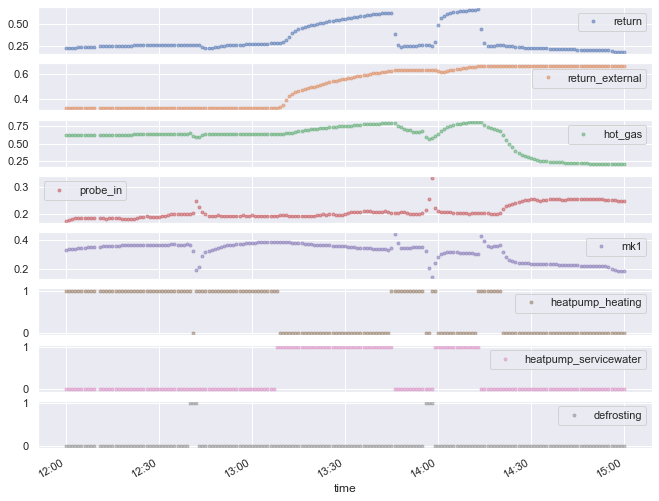

In [31]:

sns.set(rc={'figure.figsize':(20, 15)})

#merged_df[(merged_df.index > '2020-12-10 12:00:00') & (merged_df.index < '2020-12-10 15:00:00')]
df_plot = normalized_df['2020-12-10 12:00:00' : '2020-12-10 15:00:00']
#df_plot = normalized_df['2020-12-10 12:00:00' : '2020-12-10 15:00:00'] # Great visualization of heating before defrosting


cols_plot = ['return', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'heatpump_heating', 'heatpump_servicewater', 'defrosting']
axes = df_plot[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes[::-1]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.gcf().savefig('./gen/defrosting_normalized_20201210.png')
plt.show()


Now we have a resampled Pandas dataframe with all data. Let's convert this to a valid Pytorch Dataset. 

In [34]:
class HeatpumpDataset(data.Dataset):
    '''
    Heatpump dataset
    The data extracted is based on a sliding window over all data in the dataframe. The stride is dist_seq_min. The window has the length len_seq_min-len_future_min and goes into sample_x. Another window with an offset of len_future_min is the basis for sample_y. 
    
    The data is extracted in randomized order.
    '''

    def __init__(self, df, input_cols, len_seq_min, len_future_min, dist_seq_min, max_samples = 0, sample_filter=None, date_filter = None, transform=None):
        ''' 
        INPUT
        df - dataframe with heatpump data
        input_cols - columns for sample_x
        len_seq_min - Full length (past+future) for sliding window
        len_future_min - Number of minutes in the future for sample_y
        dist_seq_min: the stride
        max_samples: Maximum number of samples to be extracted or 0 if all samples should be extracted.
        sample_filter (callable, optional): filter samples
        date_filter (callable, optional): Filter timestamps for sample extraction
        transform (callable, optional): Transform to be applied so samples
        '''
        self.df = df
        self.input_cols = input_cols
        self.len_seq_min = len_seq_min
        self.len_future_min = len_future_min
        self.dist_seq_min = dist_seq_min
        self.sample_filter = sample_filter
        self.date_filter = date_filter
        self.transform = transform
        self.samples = []
        self.samples_x = []
        self.samples_y = []

#        date_list = pd.date_range(df.index[0],df.index[-1]-pd.Timedelta(days=1),freq='d')
        date_list = pd.date_range(self.df.index[0]-pd.Timedelta(seconds=30), self.df.index[-1],freq='{}min'.format(self.dist_seq_min)).tolist()
        # We need to shuffle the dates, because if we stop after max_samples we would only get early samples from 2016
        random.shuffle(date_list)

        for date in date_list:
            # Go through all dates which are not filtered
            if self.date_filter(date):
                sample_df = self.df[date : date+pd.Timedelta(minutes=self.len_seq_min)]

                # Use this sample only if full sequence available
                if (sample_df.shape[0]==self.len_seq_min):

                    # ...and of course if it is not filtered
                    if self.sample_filter(sample_df):
                        self.samples.append(sample_df)
                        self.samples_x.append(None)
                        self.samples_y.append(None)

                        if max_samples > 0 and len(self.samples) >= max_samples:
                            break;

    def __len__(self):
        '''
        Number of extracted samples
        '''
        return len(self.samples)

    def __getitem__(self, idx):
        '''
        Get sample data at index

        INPUT
        idx - Index of sample

        OUTPUT
        sample_x - np.Array with sample data, shape: [len(input_cols), len_seq_min - len_future_min]
        sample_y - np.Array with index to class of defrosting happens len_future_min minutes later
                   shape: [len_seq_min - len_future_min]
                   classes: normal, defrosting
        '''
        if torch.is_tensor(idx):
            idx = idx.tolist()

#        print("HeatpumpDataset.__getitem__ ", idx)
        sample_x = self.samples_x[idx]
        sample_y = self.samples_y[idx]

        if sample_x is None or sample_y is None:
            sample_df = self.samples[idx]

            sample_x = sample_df[self.input_cols].iloc[0 : self.len_seq_min - self.len_future_min].to_numpy(dtype=np.float32) # Size: 5

            # sample_y with logits for the last len_seq_min-len_future_min (e.g. 120 - 5 = 115)
            sample_y = torch.empty(self.len_seq_min-self.len_future_min, dtype=torch.long)
            for i in range(self.len_seq_min-self.len_future_min):
    #            print("sample_i: ", i, " # ", i, " # ", i + self.len_future_min)
                sample_y[i] = 1 if sample_df['defrosting'].iloc[i + 1 : i + self.len_future_min + 1].sum() > 0 else 0

    #        print("sample_y: ", sample_y)

            if self.transform:
                sample_x, sample_y = self.transform(sample_x, sample_y)

        self.samples_x[idx] = sample_x
        self.samples_y[idx] = sample_y

        return sample_x, sample_y


In [35]:
len_seq_min = 120
len_future_min = 5
dist_seq_min = 3

# input_cols = ['outside', 'return', 'reference_return', 'supply', 'servicewater_reference', 'servicewater', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'compressor_heating', 'heatpump_heating', 'heatpump_servicewater', 'heatpump_running']
# input_cols = ['return', 'supply', 'return_external', 'hot_gas', 'probe_in', 'compressor_heating', 'heatpump_heating', 'heatpump_servicewater', 'heatpump_running', 'defrosting']
input_cols = ['hot_gas', 'probe_in', 'return', 'heatpump_running', 'defrosting']

# Filter to allow max. ~20% of normal samples without defrosting in the last xxx minutes
filter_normal10 = lambda df: ((df['defrosting'].iloc[len_seq_min - len_future_min : len_seq_min].sum() > 0) or (random.random() > 0.80 ))

# Filter to split training and test data on day of month
filter_train = lambda d: ((d.month >= 9) | (d.month <= 4)) & ((d.hour >= 11) & (d.hour < 18) & ((d.day % 5) != 0)) # all days but the 5th, 10th, 15th, ...
filter_test = lambda d: ((d.month >= 9) | (d.month <= 4)) & ((d.hour >= 11) & (d.hour < 18) & ((d.day % 5) == 0)) # only the 5th, 10th, 15th, ...

train_dataset = HeatpumpDataset(normalized_df, input_cols, len_seq_min, len_future_min, dist_seq_min, max_samples = 0, sample_filter = filter_normal10, date_filter = filter_train)
print("Train dataset: ", len(train_dataset))

test_dataset = HeatpumpDataset(normalized_df, input_cols, len_seq_min, len_future_min, dist_seq_min, max_samples = 0, sample_filter = filter_normal10, date_filter = filter_test)
print("Test dataset: ", len(test_dataset))


Train dataset:  10641
Test dataset:  2414


In [36]:
defrost_num = 0

for i in range(len(train_dataset)):
    defrost_num += train_dataset[i][1][-1].item() # last timestep holds logit for sample_y (1 == defrosting)

print("Training samples with defrosting: ", defrost_num, " (", defrost_num/len(train_dataset), ")")

train_weights = [defrost_num / len(train_dataset), 1-(defrost_num / len(train_dataset))]

print("Weights: ", train_weights)

Training samples with defrosting:  2062  ( 0.19377878018983177 )
Weights:  [0.19377878018983177, 0.8062212198101683]


DEFROSTING samples!


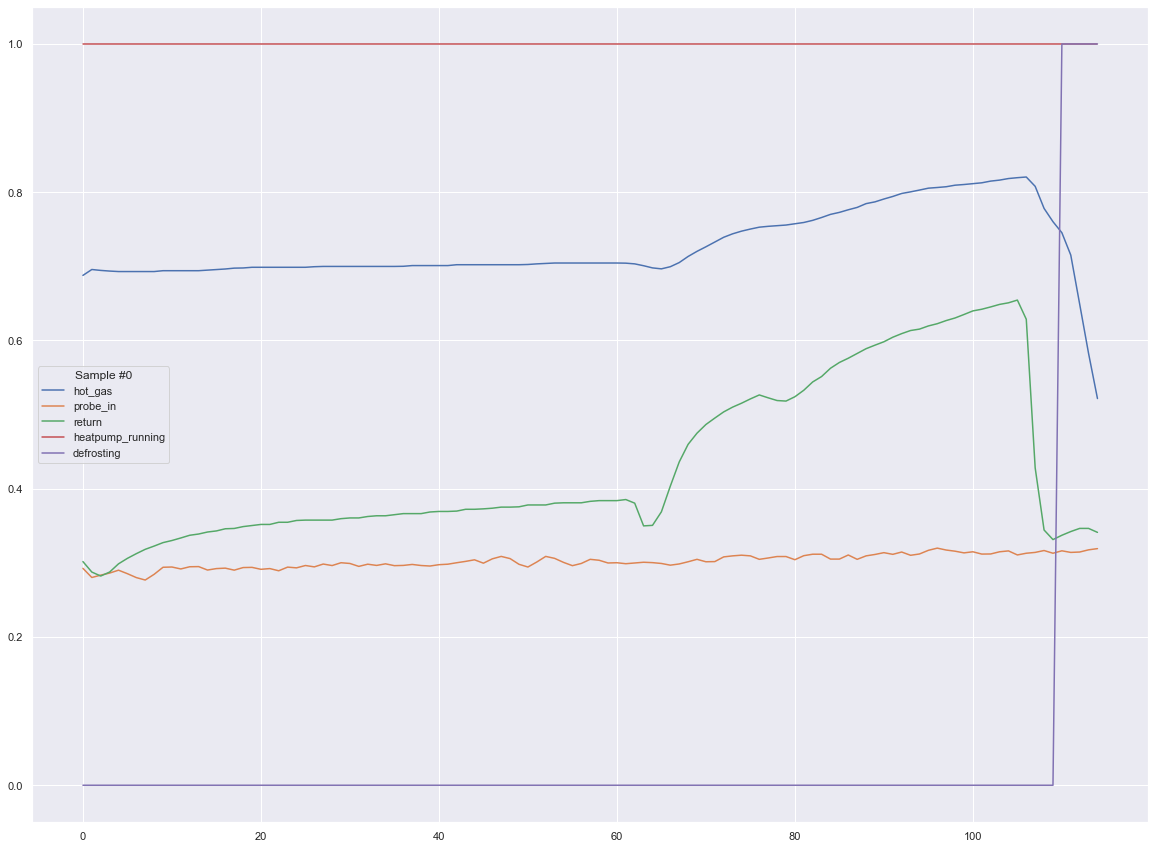

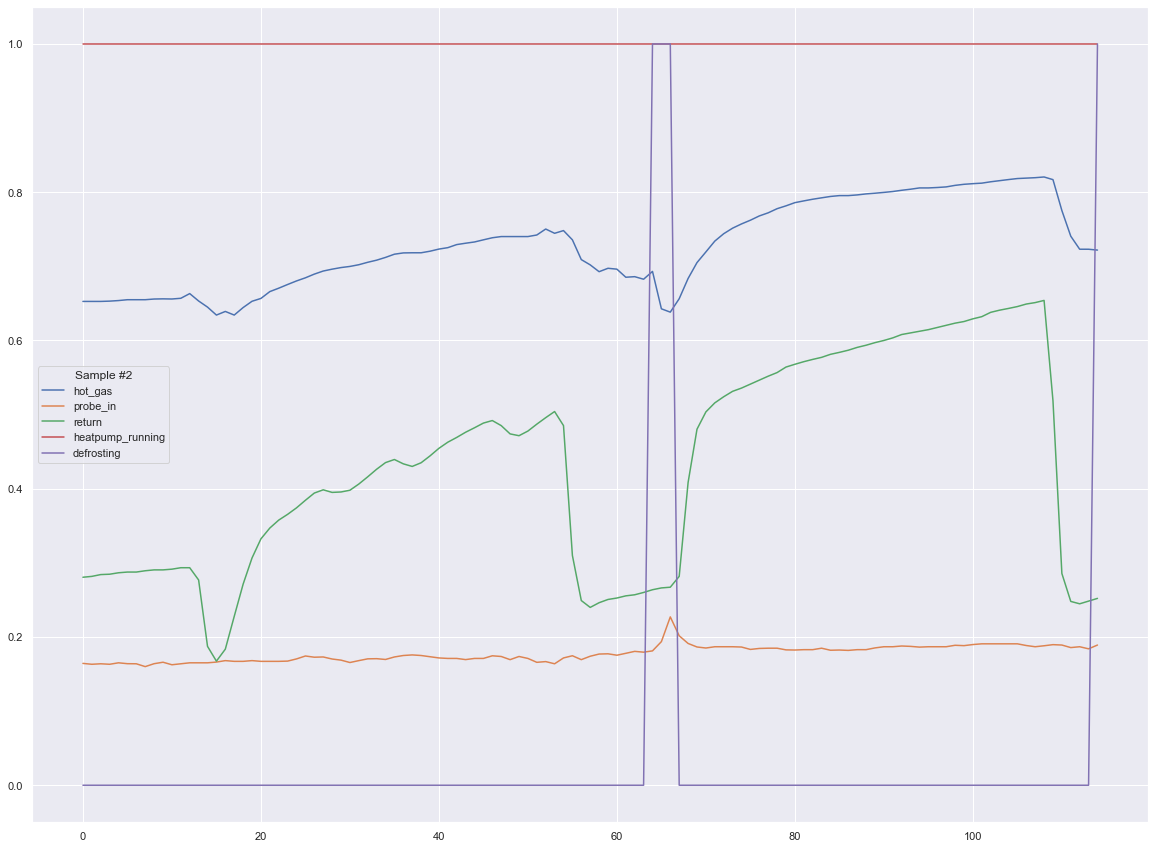

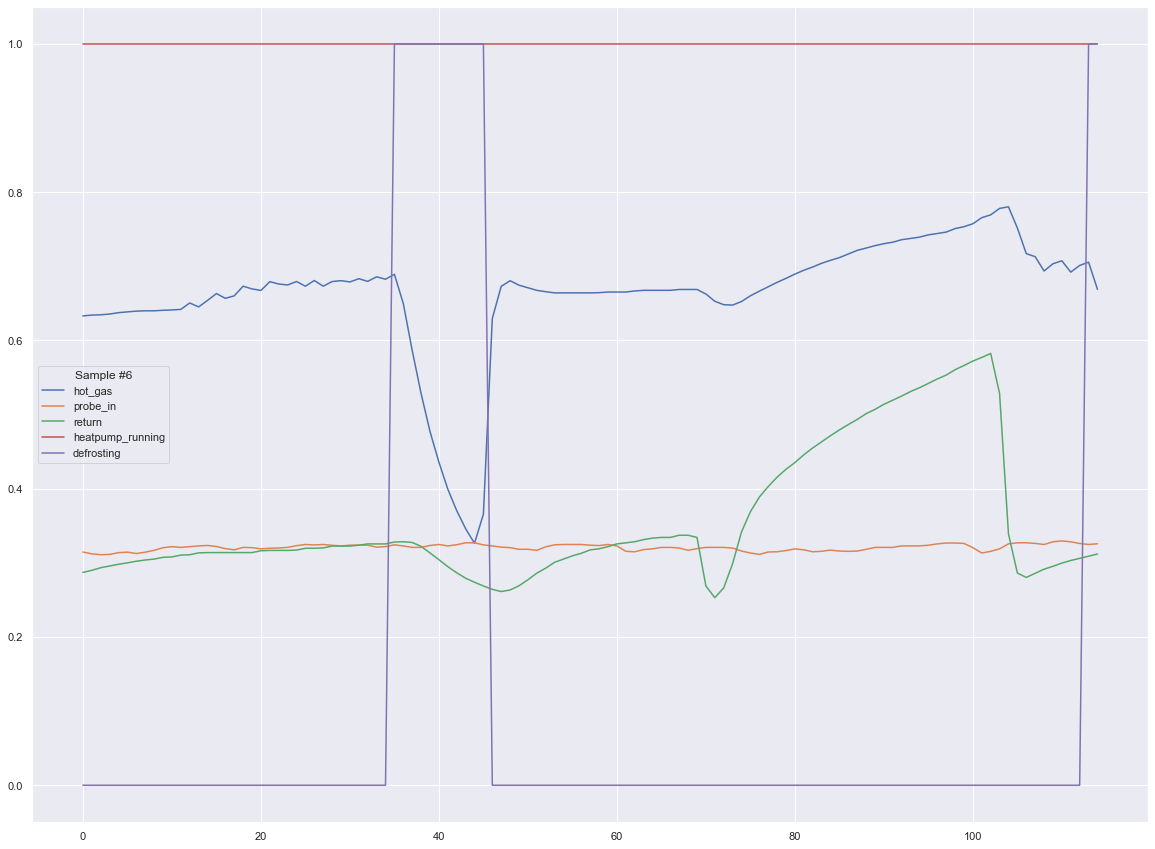

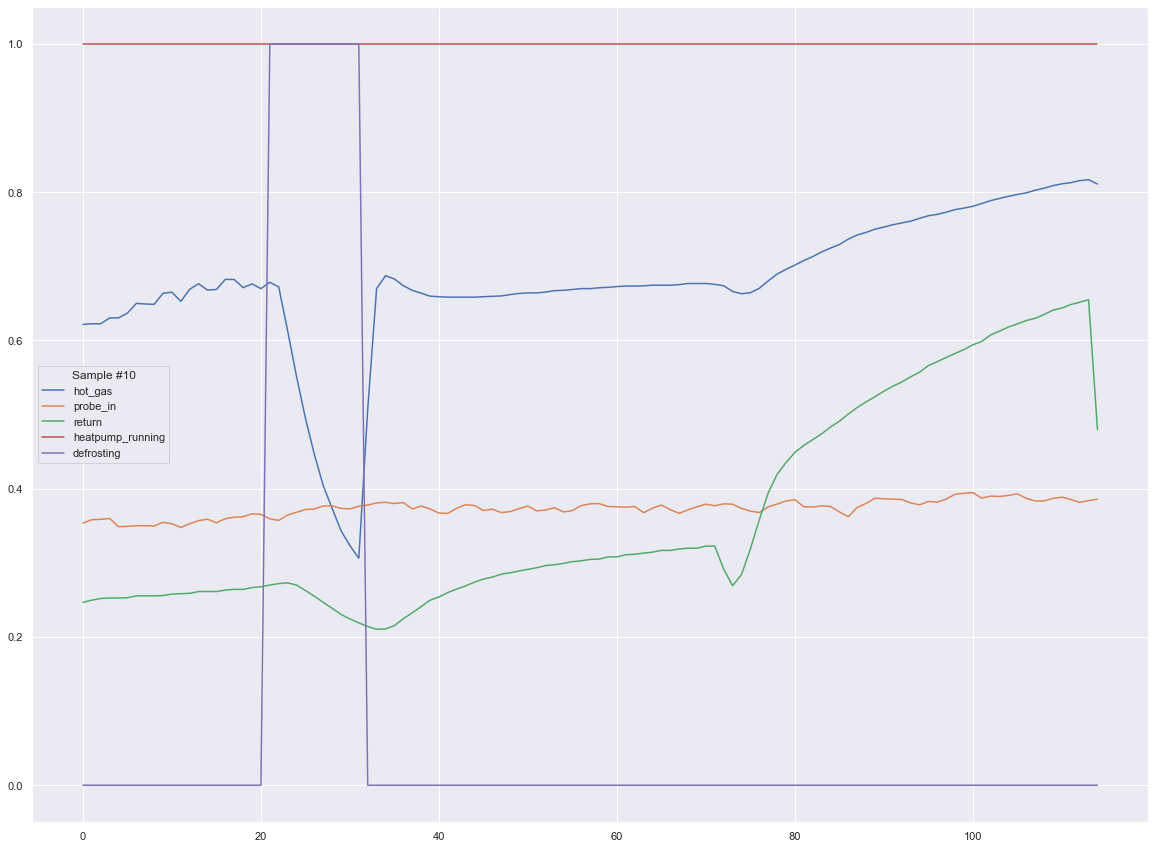

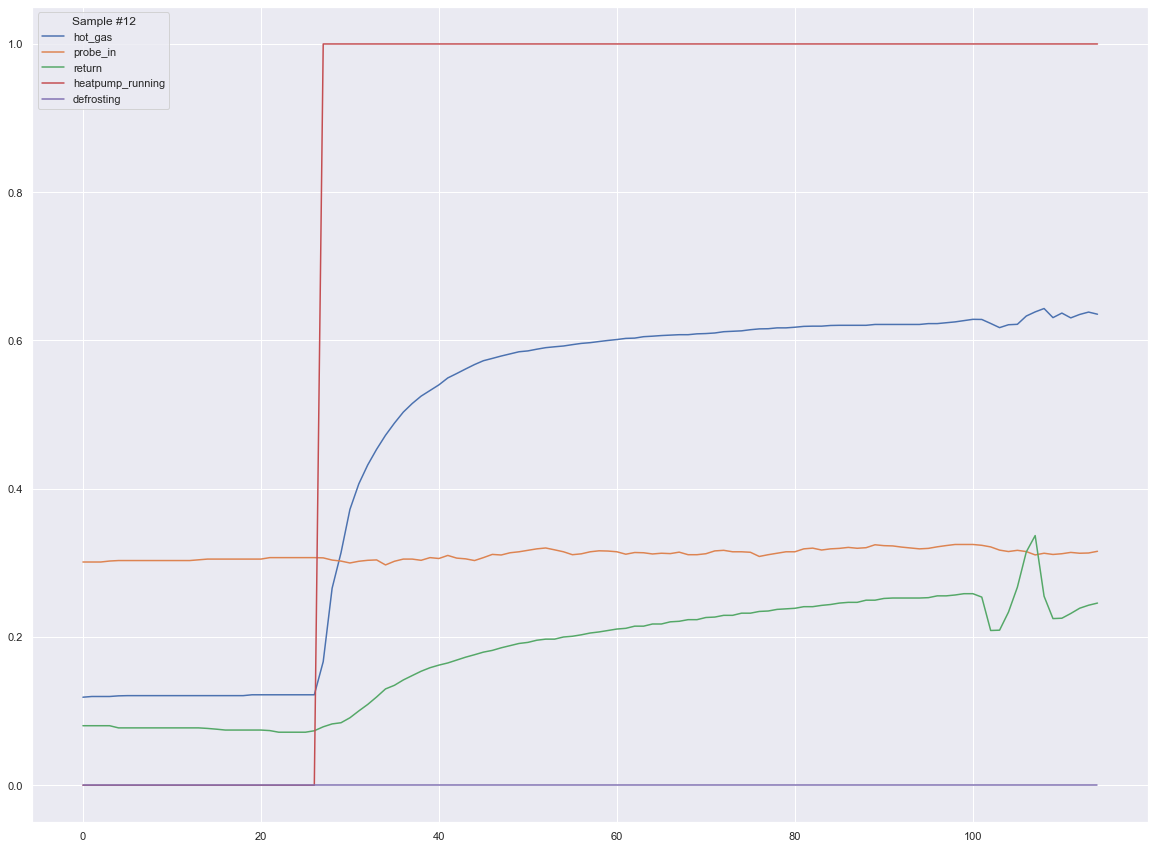

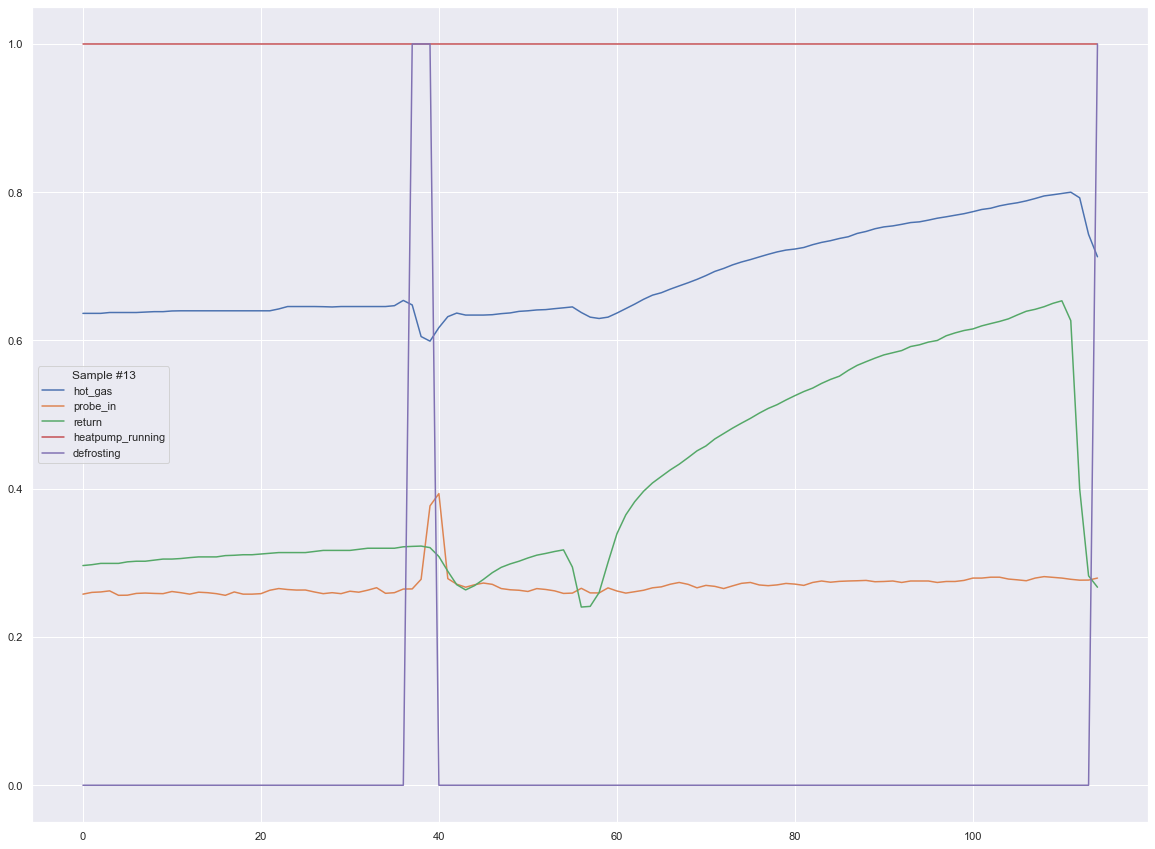

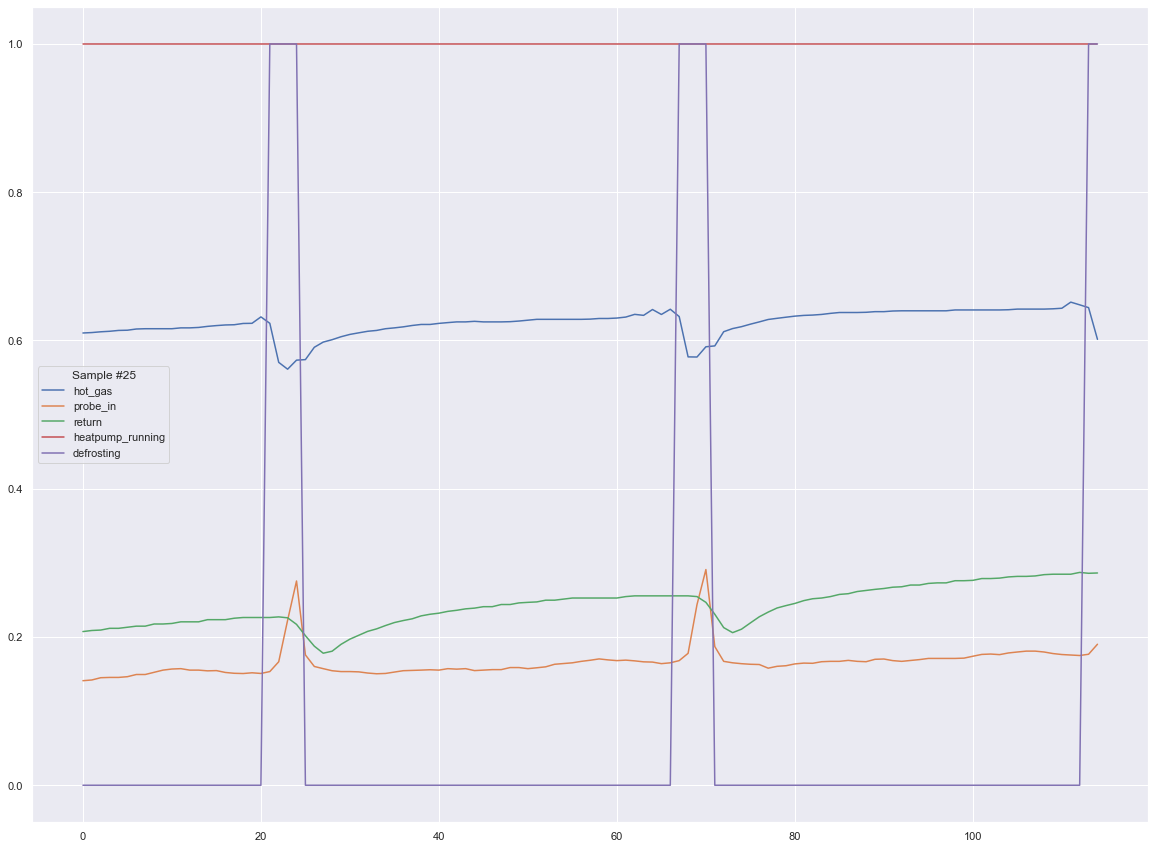

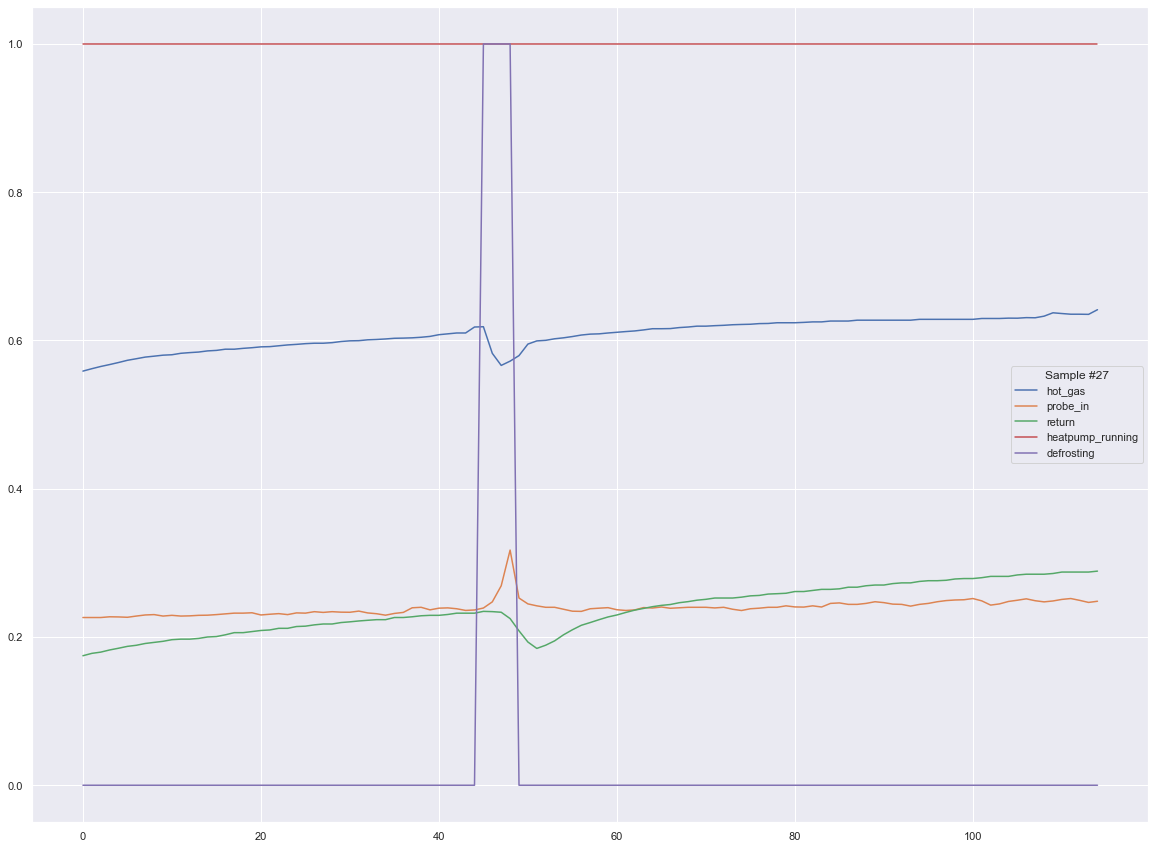

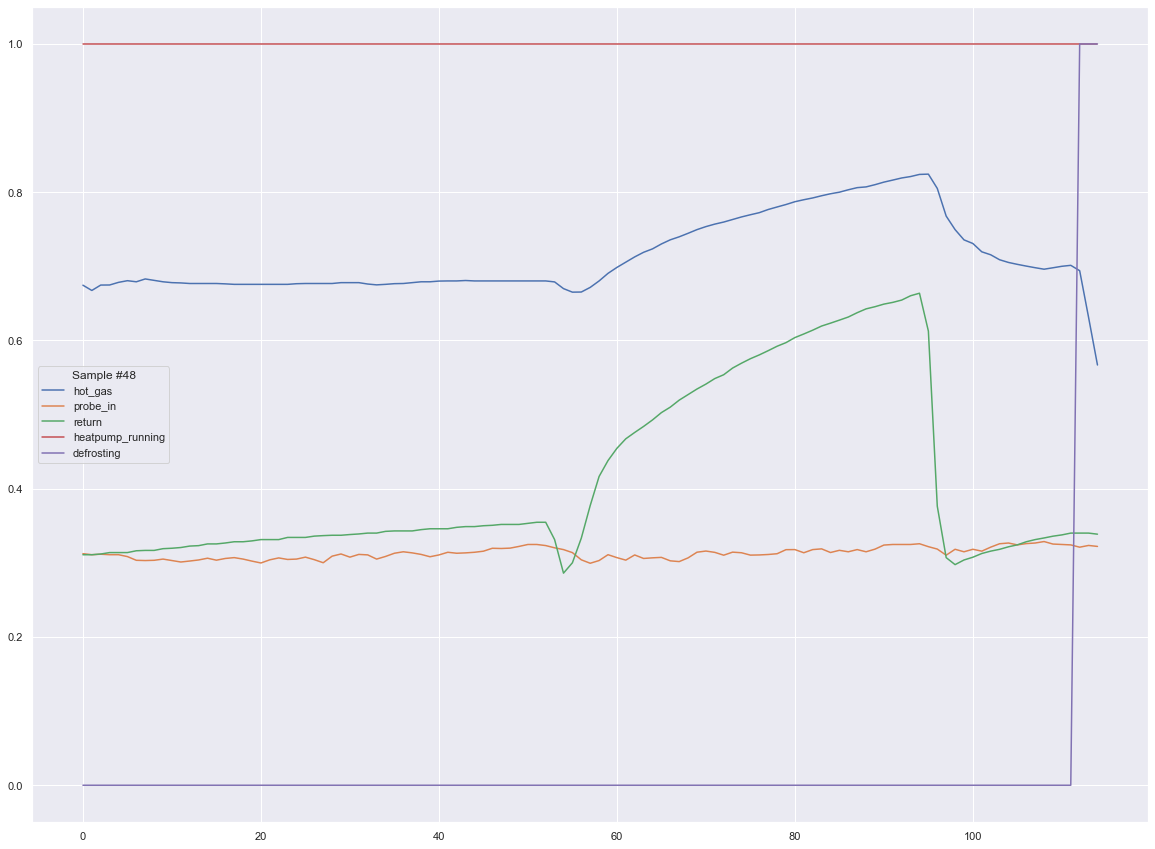

Normal samples!


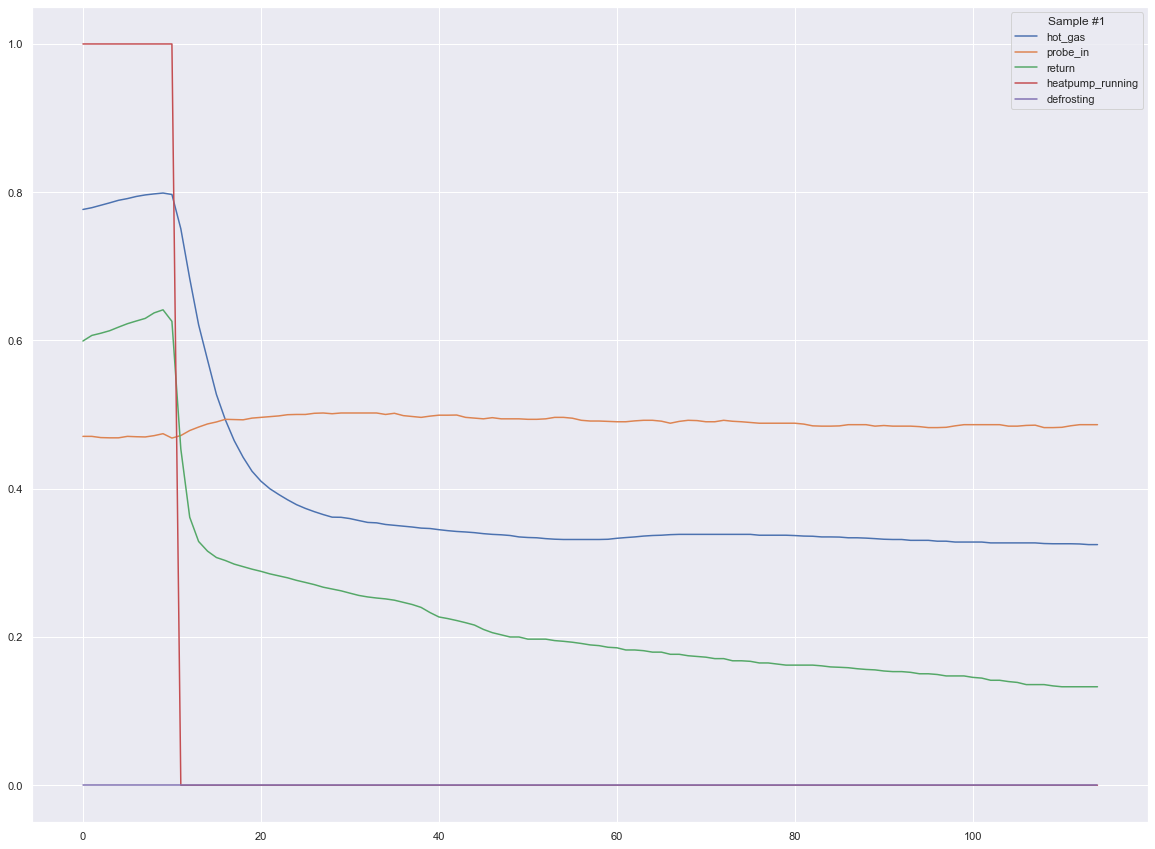

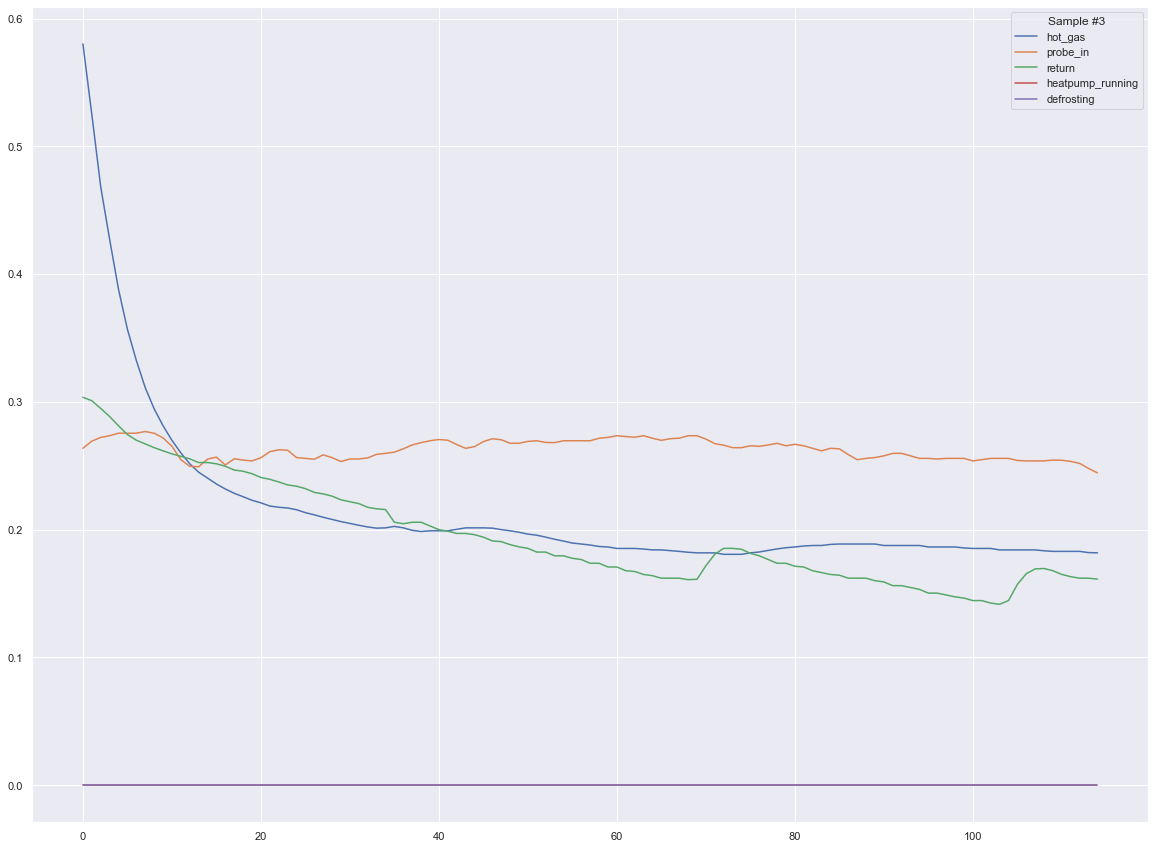

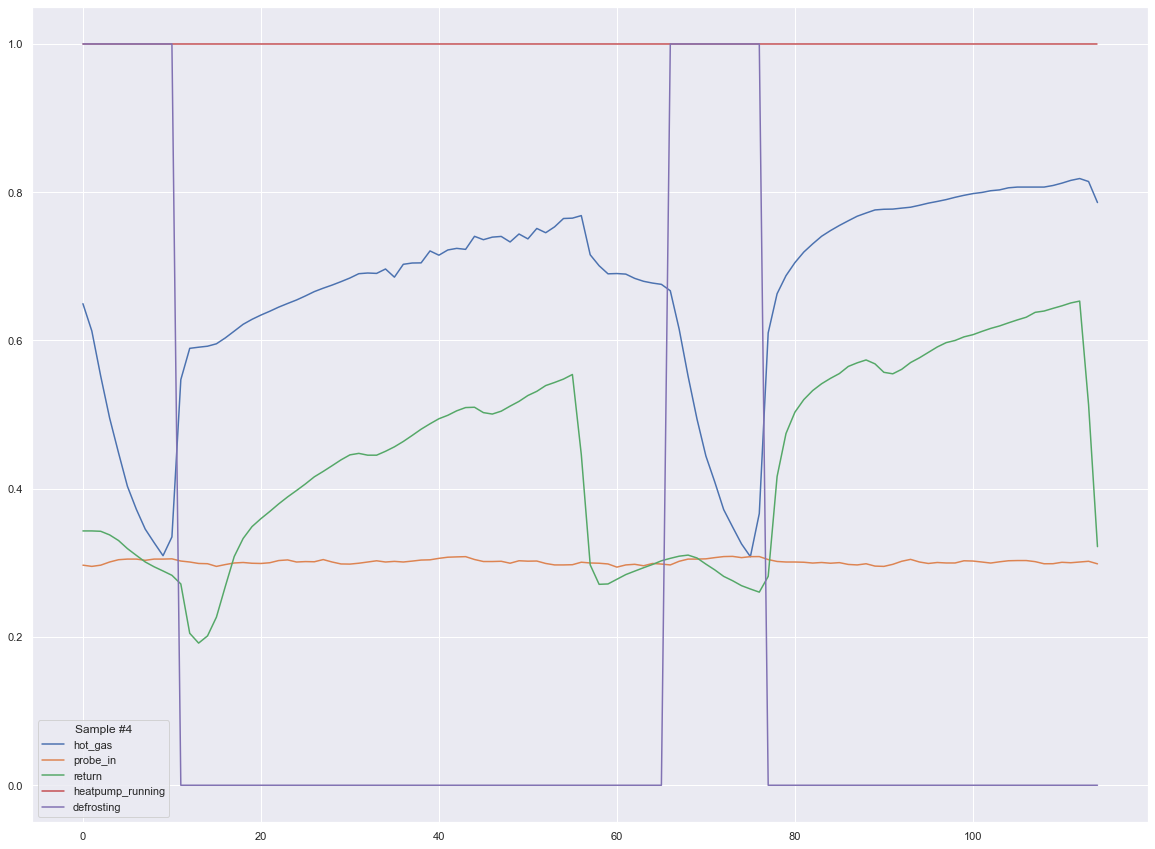

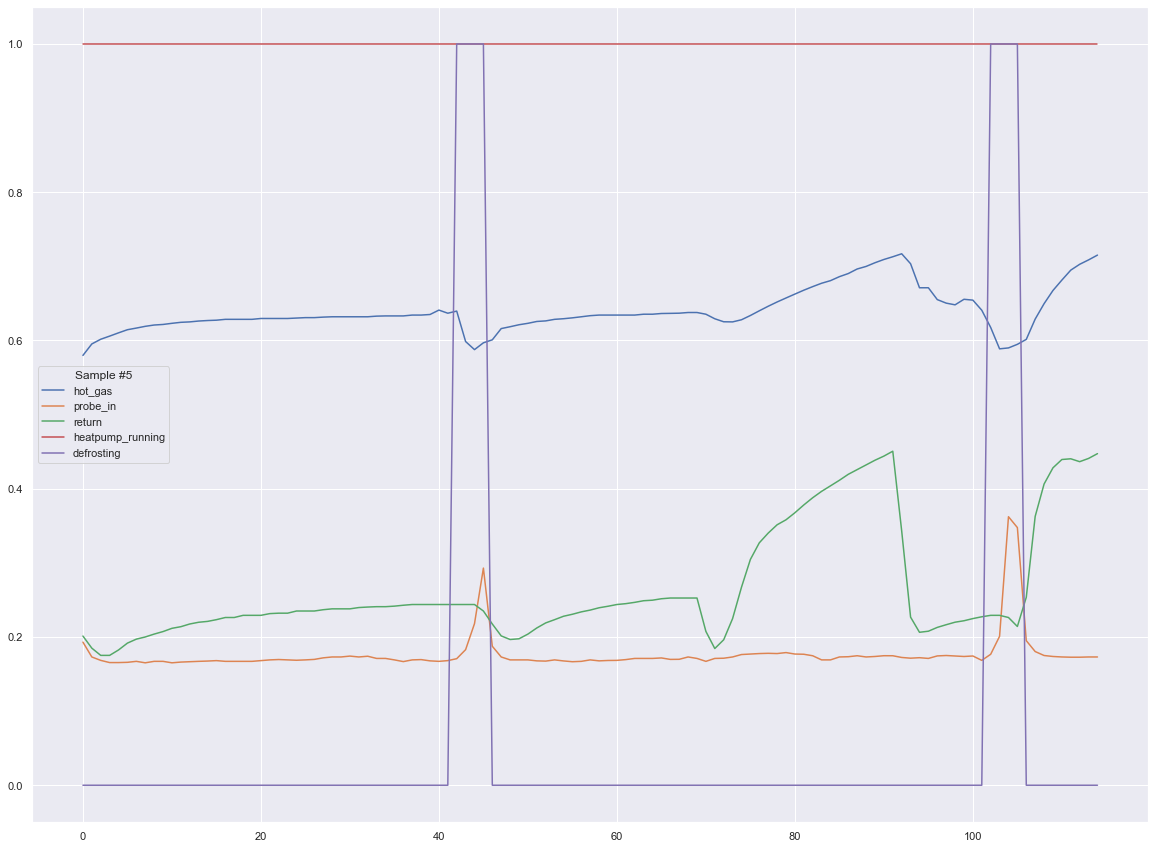

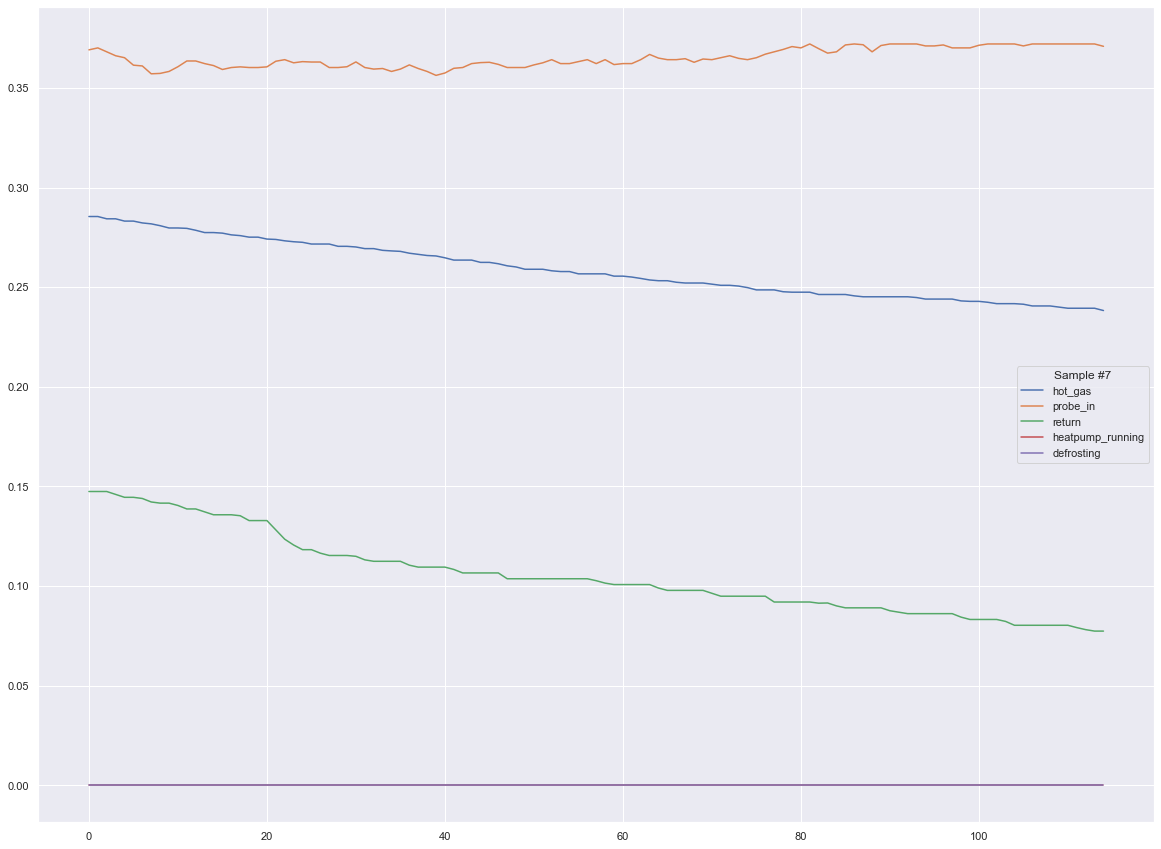

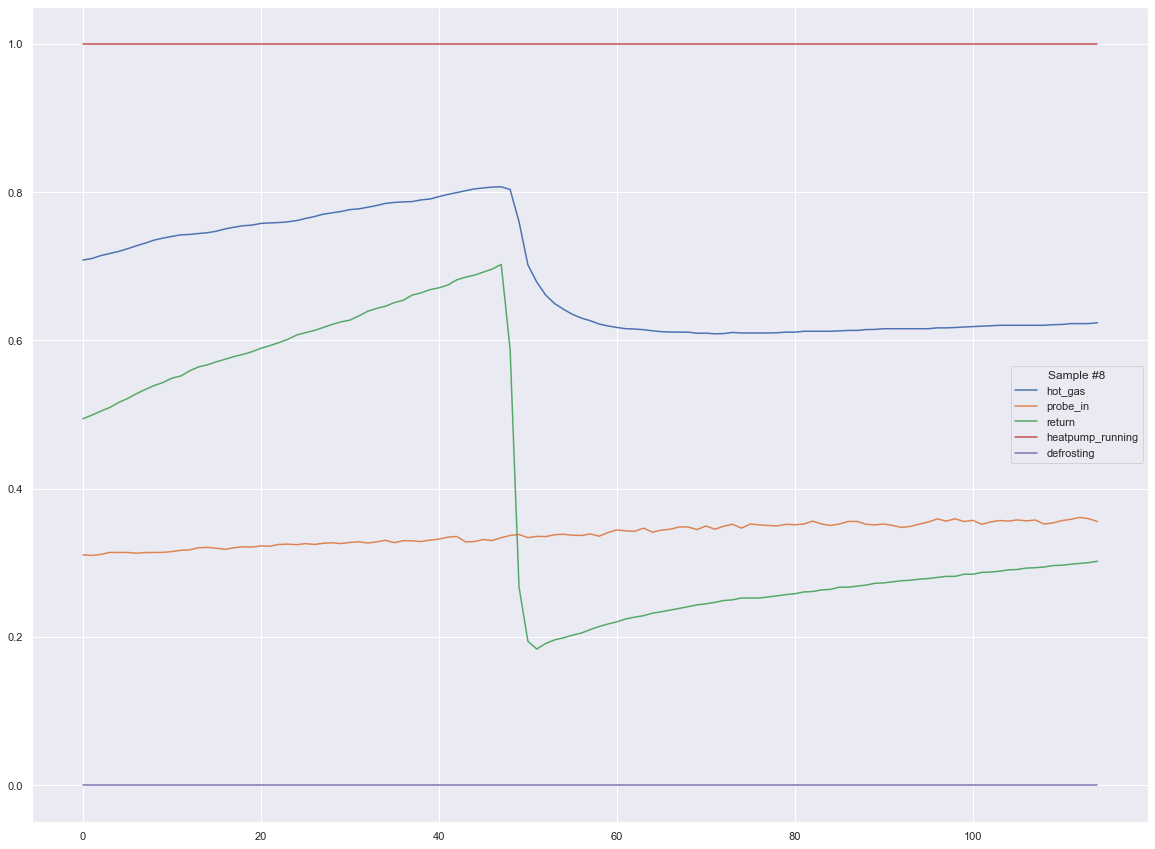

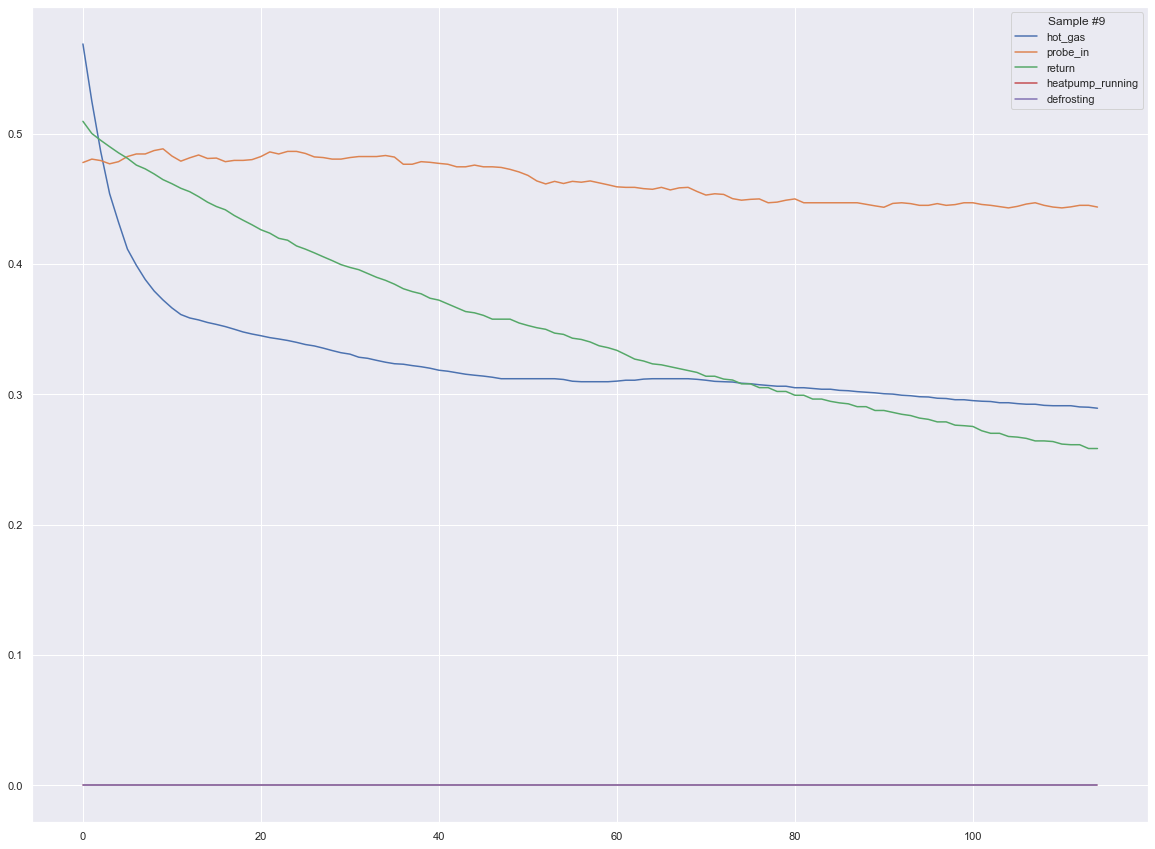

In [37]:

print("DEFROSTING samples!")

for i in range(50):
    sample = train_dataset[i]
    if sample[1][-1].item() == 1.0:
        [plt_hot_gas, plt_probe_in, plt_return, plt_heatpump_running, plt_defrosting] = plt.plot(sample[0])
        plt.legend([plt_hot_gas, plt_probe_in, plt_return, plt_heatpump_running, plt_defrosting], ['hot_gas', 'probe_in', 'return', 'heatpump_running', 'defrosting'], title='Sample #{}'.format(i))
        plt.show()
    

print("Normal samples!")

for i in range(10):
    sample = train_dataset[i]
    if sample[1][-1].item() == 0.0:
        [plt_hot_gas, plt_probe_in, plt_return, plt_heatpump_running, plt_defrosting] = plt.plot(sample[0])
        plt.legend([plt_hot_gas, plt_probe_in, plt_return, plt_heatpump_running, plt_defrosting], ['hot_gas', 'probe_in', 'return', 'heatpump_running', 'defrosting'], title='Sample #{}'.format(i))
        plt.show()


In [38]:
batch_size = 32

train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=batch_size, batch_sampler=None, shuffle=False,
                                             num_workers=0, drop_last=True)

test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                             batch_size=batch_size, batch_sampler=None, shuffle=False,
                                             num_workers=0, drop_last=True)



In [56]:
class Trainer:
    def __init__(self, model, criterion, optimizer, picfile = None):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.picfile = picfile

        self.train_hist = []
        self.test_hist = []
        self.accuracy_hist = []

    def batch_accuracy(self, prediction, target):
        _, predicted = torch.max(prediction, 1)

        match = (predicted == target)
        target_weighted = target.double()
        target_weighted[target_weighted==1] = train_weights[1] # fill in weights for label "defrosting"
        target_weighted[target_weighted==0] = train_weights[0] # fill in weights for label "normal"
        match_weighted = target_weighted * match

        return match_weighted.sum().item(), target_weighted.sum().item()

    def train_epoch(self, dataloader):
        # input_dim: number of features at one timestep (3)
        # len_seq: number of timesteps in one sample (115)
        # batch_size: number of samples in a batch (32)
        # output_dim: raw output logits for normal and defrost happening (2)

        self.model.train()
        running_loss = 0.0
        for j,batch in enumerate(dataloader):
            x_train = batch[0] # [batch_size, len_seq, input_dim]
            y_train = batch[1] # [batch_size, len_seq]
            y_train = y_train.reshape(-1) # [batch_size, len_seq] -> [batch_size * len_seq]

            self.optimizer.zero_grad()

            y_pred = self.model(x_train) # [batch_size * len_seq, output_dim]

            loss = self.criterion(y_pred, y_train) # criterion(input, target)

            running_loss += loss.item() * x_train.size(0)

            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), 5) #  Clip exploding gradients
            self.optimizer.step()
        return running_loss / ((j+1)*dataloader.batch_size)

    def test_batch(self, batch): 
        # batch: [batch_size, len_seq, output_dim]
        with torch.no_grad():
            self.model.eval()
            
            y_pred = self.model(batch) # [batch_size * len_seq, output_dim]
        return y_pred

    def test_epoch(self, dataloader):
        with torch.no_grad():
            self.model.eval()

            total = 0
            correct = 0
            running_loss = 0.0
            for j,batch in enumerate(dataloader):
                x_test = batch[0] # [batch_size, len_seq, input_dim]
                y_test = batch[1] # [batch_size, len_seq]
                y_test = y_test.reshape(-1) # [batch_size, len_seq] -> [batch_size * len_seq]

                y_pred = self.model(x_test) # [batch_size * len_seq, output_dim]

                loss = self.criterion(y_pred, y_test) # criterion(input, target)

                match_weighted, target_weighted = self.batch_accuracy(y_pred.data, y_test)
                total += target_weighted
                correct += match_weighted

                running_loss += loss.item() * x_test.size(0)

        return running_loss / ((j+1)*test_dataloader.batch_size), correct / total

    def train(self, train_dataloader, test_dataloader, epochs = 100):

        print("Model: ", self.model)
        best_epoche = 0

        for i in range(epochs):
            train_loss = self.train_epoch(train_dataloader)

            self.train_hist.append(train_loss)

            test_loss, test_accuracy = self.test_epoch(test_dataloader)

            self.test_hist.append(test_loss)
            self.accuracy_hist.append(test_accuracy)

            if i%1 == 0:
                print("Epoch #", i+1, ": Train: ",self.train_hist[i], " / ", self.test_hist[i], " / ", self.accuracy_hist[i])
            
            if test_accuracy > self.accuracy_hist[best_epoche]:
                best_epoche = i
            
        sns.set(rc={'figure.figsize':(10, 5)})
        plt.plot(self.train_hist, label='train')
        plt.plot(self.test_hist, label='test')
        plt.plot(self.accuracy_hist, label='accuracy')
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.legend()
        if self.picfile is not None:
            plt.gcf().savefig(self.picfile)
        plt.show()
        
        print("Best Epoch #", best_epoche+1, ": Train: ",self.train_hist[best_epoche], " / ", self.test_hist[best_epoche], " / ", self.accuracy_hist[best_epoche])
        

In [78]:
class DefrostLSTMLin(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim=2, num_layers=2, lstm_dropout = 0.0, output_dropout = 0.0):
        super(DefrostLSTMLin, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # NN layers
        # input -> LSTM+Dropout -> Linear -> Dropout -> output
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers, dropout = lstm_dropout, batch_first = True)
        self.linear = nn.Linear(self.hidden_dim, output_dim)
        self.dropout = nn.Dropout(output_dropout)

    def forward(self, input):
        # input: [batch_size, seq_len, input_dim]

        # Forward pass through LSTM layer

        # Syntax: output, (hidden, cell) = lstm(input, (hidden, cell))
        lstm_out, self.hidden = self.lstm(input) #  -> [batch_size, seq_len, hidden_dim], (hidden, cell)

        # Forward pass through linear layer

        lstm_out = lstm_out.reshape(-1, self.hidden_dim) # [batch_size * seq_len, hidden_dim]
        y_pred = self.linear(lstm_out) # [batch_size * seq_len, output_dim]

        # Forward pass through dropout layer
        y_pred = self.dropout(y_pred) # [batch_size * seq_len, output_dim]
        return y_pred



Model:  DefrostLSTMLin(
  (lstm): LSTM(5, 20, batch_first=True)
  (linear): Linear(in_features=20, out_features=2, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)
Epoch # 1 : Train:  0.37436878147074976  /  0.27597201665242516  /  0.8880672178938424
Epoch # 2 : Train:  0.2534158635570342  /  0.2379482591152191  /  0.8938598497414144
Epoch # 3 : Train:  0.234882480588304  /  0.22559490382671357  /  0.8994014153291733
Epoch # 4 : Train:  0.22769123302346253  /  0.22140946527322133  /  0.900525585337702
Epoch # 5 : Train:  0.2228590752705034  /  0.21684162159760792  /  0.9005253076487192
Epoch # 6 : Train:  0.22035055733229741  /  0.2145459089676539  /  0.9009658626364463
Epoch # 7 : Train:  0.2186948609011001  /  0.21350368241469064  /  0.9002956007720805
Epoch # 8 : Train:  0.2170300683433033  /  0.21305699686209362  /  0.9002838839971501
Epoch # 9 : Train:  0.21499668438750577  /  0.21348961671193442  /  0.9008900903804812
Epoch # 10 : Train:  0.21410168491932283  /  0.21340087

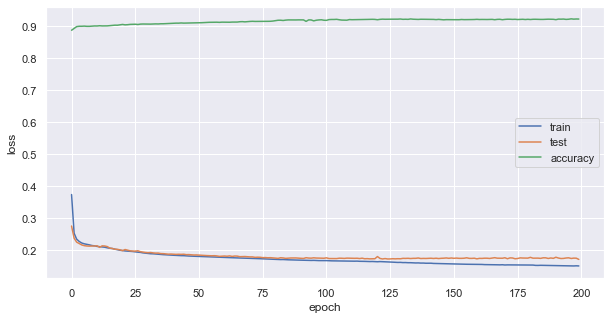

Best Epoch # 197 : Train:  0.15131940129381347  /  0.17453560531139373  /  0.9236651277379376


In [79]:

### 3 min
model = DefrostLSTMLin(input_dim = len(input_cols), hidden_dim = 20, output_dim=2, num_layers=1, lstm_dropout = 0.0)

# optimizer , loss
#criterion = torch.nn.MSELoss()
#criterion = torch.nn.BCEWithLogitsLoss()
#criterion = torch.nn.BCELoss()
criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_20x1xlstm+lin.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)


Model:  DefrostLSTMLin(
  (lstm): LSTM(5, 20, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=20, out_features=2, bias=True)
)
Epoch # 1 : Train:  0.3720910844045231  /  0.25950047075748445  /  0.8918078131665905
Epoch # 2 : Train:  0.24964471426175303  /  0.23244701365629833  /  0.8976706323213033
Epoch # 3 : Train:  0.23486119746623269  /  0.223130504488945  /  0.8998675715409625
Epoch # 4 : Train:  0.2289696394140462  /  0.2185953696568807  /  0.8997709187736399
Epoch # 5 : Train:  0.22491857265851584  /  0.2144643727938334  /  0.9007479731261551
Epoch # 6 : Train:  0.22099039375961546  /  0.21144139568010967  /  0.9018979427080189
Epoch # 7 : Train:  0.21871276285095387  /  0.20971474647521973  /  0.9027568800682791
Epoch # 8 : Train:  0.21678967540522656  /  0.2075889346996943  /  0.90302926179107
Epoch # 9 : Train:  0.21507341917379794  /  0.20571736216545106  /  0.9034903430950235
Epoch # 10 : Train:  0.21353425121450997  /  0.2042533775170644  /  0.903343588718044

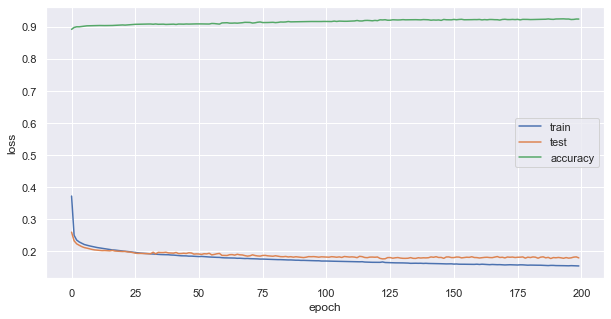

Best Epoch # 194 : Train:  0.15500401016549173  /  0.17808762709299722  /  0.9245282261825952


In [59]:

### 3 min
model = DefrostLSTMLin(input_dim = len(input_cols), hidden_dim = 20, output_dim=2, num_layers=1, lstm_dropout = 0.2)

# optimizer , loss
#criterion = torch.nn.MSELoss()
#criterion = torch.nn.BCEWithLogitsLoss()
#criterion = torch.nn.BCELoss()
criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_20x1xlstm_do+lin.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)



Model:  DefrostLSTMLin(
  (lstm): LSTM(5, 30, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=30, out_features=2, bias=True)
)
Epoch # 1 : Train:  0.36859919050012724  /  0.2643762316306432  /  0.8895482040772489
Epoch # 2 : Train:  0.2495102518832827  /  0.23210214217503866  /  0.8955051966333676
Epoch # 3 : Train:  0.23376122570361  /  0.224476198554039  /  0.8999696746629594
Epoch # 4 : Train:  0.2270131347229682  /  0.21687131345272065  /  0.8998579983549647
Epoch # 5 : Train:  0.22153358053730196  /  0.213139018813769  /  0.8995666501913033
Epoch # 6 : Train:  0.21550541038972787  /  0.20681970000267028  /  0.9022389688639607
Epoch # 7 : Train:  0.21091352587184273  /  0.20610372424125672  /  0.9027583492696815
Epoch # 8 : Train:  0.2082786944706038  /  0.20246140539646149  /  0.9044087852372756
Epoch # 9 : Train:  0.20569424600486297  /  0.19904931823412578  /  0.9054406449107868
Epoch # 10 : Train:  0.2042556462517704  /  0.20115675767262778  /  0.9053570038557933


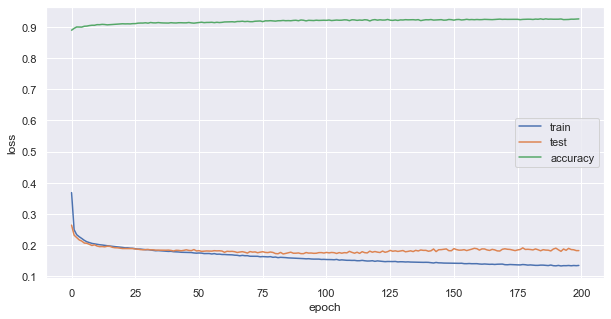

Best Epoch # 185 : Train:  0.136070653885962  /  0.18206737637519838  /  0.9259581600966128


In [60]:

### 3 min
model = DefrostLSTMLin(input_dim = len(input_cols), hidden_dim = 30, output_dim=2, num_layers=1, lstm_dropout = 0.2)

criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_30x1xlstm_do+lin.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)


Model:  DefrostLSTMLin(
  (lstm): LSTM(5, 20, num_layers=2, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=20, out_features=2, bias=True)
)
Epoch # 1 : Train:  0.35502435801079474  /  0.26239344120025637  /  0.8887191140322805
Epoch # 2 : Train:  0.25490154985742397  /  0.23463356256484985  /  0.8962827654545938
Epoch # 3 : Train:  0.2387479580938816  /  0.2244917086760203  /  0.8987807478670371
Epoch # 4 : Train:  0.2316285032464797  /  0.22031406501928966  /  0.8985502490100861
Epoch # 5 : Train:  0.22650817691920752  /  0.21664177258809408  /  0.9004707630153395
Epoch # 6 : Train:  0.2227556947843138  /  0.2164650269349416  /  0.901465869985287
Epoch # 7 : Train:  0.21947718007736897  /  0.2129937167962392  /  0.9017153947878905
Epoch # 8 : Train:  0.21618448547929167  /  0.2090760898590088  /  0.9050236552335094
Epoch # 9 : Train:  0.21344739678932959  /  0.20769840598106384  /  0.9040334559912956
Epoch # 10 : Train:  0.2115548046148685  /  0.204225079814593  /  0.90

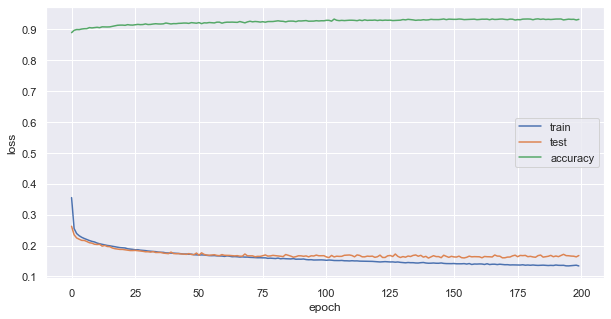

Best Epoch # 184 : Train:  0.1357620826148125  /  0.16740790357192356  /  0.9333507211028914


In [61]:
### 3 min
model = DefrostLSTMLin(input_dim = len(input_cols), hidden_dim = 20, output_dim=2, num_layers=2, lstm_dropout = 0.2)

# optimizer , loss
criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_20x2xlstm_do+lin.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)

In [46]:
class DefrostLSTMLinDO(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim=2, num_layers=2):
        super(DefrostLSTMLinDO, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # NN layers
        # input -> LSTM+Dropout -> Linear -> Dropout -> output
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers, dropout = 0.2, batch_first = True)
        self.linear = nn.Linear(self.hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.2)

    def forward(self, input):
        # input: [batch_size, seq_len, input_dim]

        # Forward pass through LSTM layer

        # Syntax: output, (hidden, cell) = lstm(input, (hidden, cell))
        lstm_out, self.hidden = self.lstm(input) #  -> [batch_size, seq_len, hidden_dim], (hidden, cell)

        # Forward pass through linear layer

        lstm_out = lstm_out.reshape(-1, self.hidden_dim) # [batch_size * seq_len, hidden_dim]
        y_pred = self.linear(lstm_out) # [batch_size * seq_len, output_dim]

        # Forward pass through dropout layer

        y_pred = self.dropout(y_pred) # [batch_size * seq_len, output_dim]
        return y_pred


Model:  DefrostLSTMLinDO(
  (lstm): LSTM(5, 20, num_layers=2, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=20, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Epoch # 1 : Train:  0.3994088802172477  /  0.26715265929698945  /  0.8892213655614707
Epoch # 2 : Train:  0.2787745591836521  /  0.23959821939468384  /  0.8948741640049207
Epoch # 3 : Train:  0.2621960981513362  /  0.22008937895298003  /  0.8988120884690005
Epoch # 4 : Train:  0.2544068719249174  /  0.2138398176431656  /  0.9005349715086711
Epoch # 5 : Train:  0.25013543858406057  /  0.21301332155863445  /  0.9013210991010402
Epoch # 6 : Train:  0.24639646322971367  /  0.2104229227701823  /  0.9019192709220221
Epoch # 7 : Train:  0.24404715010559702  /  0.21044333696365355  /  0.9014557442548848
Epoch # 8 : Train:  0.2404210248804954  /  0.20681094447771708  /  0.9030411344118577
Epoch # 9 : Train:  0.24001144110617867  /  0.20632106522719065  /  0.9029675850845345
Epoch # 10 : Train:  0.2

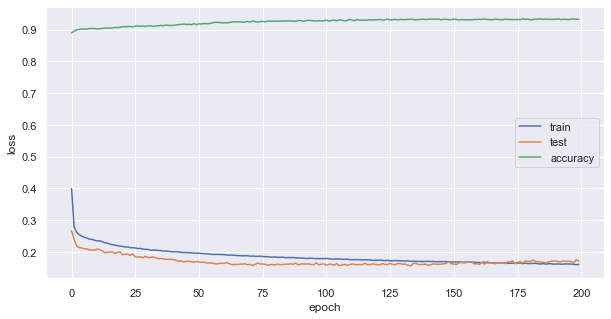

Best Epoch # 192 : Train:  0.16263121644775552  /  0.16979832490285238  /  0.9335654143563212


In [62]:
### 2 min
# 102 th iteration: Train:  0.11789783113979485  /  0.1329701417758141  /  0.9496502818144247
#model = DefrostLSTM(input_dim = len(input_cols), hidden_dim = 30, output_dim=2, num_layers=3)

# 36 th iteration: Train:  0.1351409687009533  /  0.1189181483178227  /  0.948095351257926
#model = DefrostLSTM(input_dim = len(input_cols), hidden_dim = 50, output_dim=2, num_layers=5)

# 106 th iteration: Train:  0.1348929344937425  /  0.12066106399360263  /  0.9482432717025752
#model = DefrostLSTM(input_dim = len(input_cols), hidden_dim = 20, output_dim=2, num_layers=5)

#199 th iteration: Train:  0.12043733937132851  /  0.11791639533583764  /  0.9518716672407774
#model = DefrostLSTM(input_dim = len(input_cols), hidden_dim = 20, output_dim=2, num_layers=3)

### 1 min
#73 th iteration: Train:  0.1273569963071413  /  0.12545136208818466  /  0.9467486949842943
#model = DefrostLSTM(input_dim = len(input_cols), hidden_dim = 20, output_dim=2, num_layers=3)

#43 th iteration: Train:  0.12512131836347623  /  0.13058411714586396  /  0.947886016061659
#model = DefrostLSTM(input_dim = len(input_cols), hidden_dim = 30, output_dim=2, num_layers=3)

#11 th iteration: Train:  0.1367064064974857  /  0.12228021748869876  /  0.9441934735887955
#model = DefrostLSTM(input_dim = len(input_cols), hidden_dim = 100, output_dim=2, num_layers=3)

### 3 min
model = DefrostLSTMLin(input_dim = len(input_cols), hidden_dim = 20, output_dim=2, num_layers=2, lstm_dropout = 0.2, output_dropout = 0.2)

criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_20x2xlstm_do+lin+do.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)



In [71]:
class DefrostCNNLSTM(nn.Module):

    def __init__(self, input_dim, lstm_input_dim, lstm_hidden_dim, output_dim=2, num_layers=2, lstm_dropout = 0.0, output_dropout = 0.0):
        super(DefrostCNNLSTM, self).__init__()
        self.input_dim = input_dim
        self.lstm_input_dim = lstm_input_dim
        self.lstm_hidden_dim = lstm_hidden_dim
        self.num_layers = num_layers

        # NN layers
        # input -> CNN + Relu -> LSTM+Dropout -> Linear -> Dropout -> output
        
        self.conv = nn.Conv1d(self.input_dim, self.lstm_input_dim, kernel_size=5, padding=2, padding_mode = 'replicate')
        self.lstm = nn.LSTM(self.lstm_input_dim, self.lstm_hidden_dim, self.num_layers, dropout = lstm_dropout, batch_first = True)
        self.linear = nn.Linear(self.lstm_hidden_dim, output_dim)
        self.dropout = nn.Dropout(output_dropout)

    def forward(self, input):
        # input: [batch_size, seq_len, input_dim]

        input = input.reshape(-1, self.input_dim, input.size(1)) # [batch_size, lstm_input_dim, seq_len]
#        print("input.reshape: ", input.shape)
        # Forward pass through CNN layer

        # Syntax: output, (hidden, cell) = lstm(input, (hidden, cell))
        cnn_out = F.relu(self.conv(input)) #  -> [batch_size, seq_len, lstm_hidden_dim], (hidden, cell)
#        print("cnn_out: ", cnn_out.shape)

        # Forward pass through LSTM layer

        lstm_in = cnn_out.reshape(-1, cnn_out.size(2), self.lstm_input_dim) # [batch_size, seq_len, lstm_input_dim]
#        print("lstm_in: ", lstm_in.shape)

        # Syntax: output, (hidden, cell) = lstm(input, (hidden, cell))
        lstm_out, self.hidden = self.lstm(lstm_in) #  -> [batch_size, seq_len, lstm_hidden_dim], (hidden, cell)

        # Forward pass through linear layer

        lstm_out = lstm_out.reshape(-1, self.lstm_hidden_dim) # [batch_size * seq_len, lstm_hidden_dim]
        y_pred = self.linear(lstm_out) # [batch_size * seq_len, output_dim]

        # Forward pass through dropout layer

        # Forward pass through dropout layer
        y_pred = self.dropout(y_pred) # [batch_size * seq_len, output_dim]

        return y_pred


Model:  DefrostCNNLSTM(
  (conv): Conv1d(5, 5, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=replicate)
  (lstm): LSTM(5, 20, num_layers=2, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=20, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Epoch # 1 : Train:  0.5246272307023945  /  0.46942368308703103  /  0.7491522885002193
Epoch # 2 : Train:  0.374315599450864  /  0.25242078642050425  /  0.8908809964346632
Epoch # 3 : Train:  0.25019940150430403  /  0.1980629527568817  /  0.9113682661898704
Epoch # 4 : Train:  0.22215722052447767  /  0.17956044693787893  /  0.9198977907328061
Epoch # 5 : Train:  0.20399540357560997  /  0.16742289106051128  /  0.9238828684862737
Epoch # 6 : Train:  0.19064991593540434  /  0.1527686313788096  /  0.9313913320568491
Epoch # 7 : Train:  0.1798043286270765  /  0.14671498308579126  /  0.9337931618254959
Epoch # 8 : Train:  0.1733050085828606  /  0.14903701374928158  /  0.935436788745893
Epoch # 9 : Train:  0.

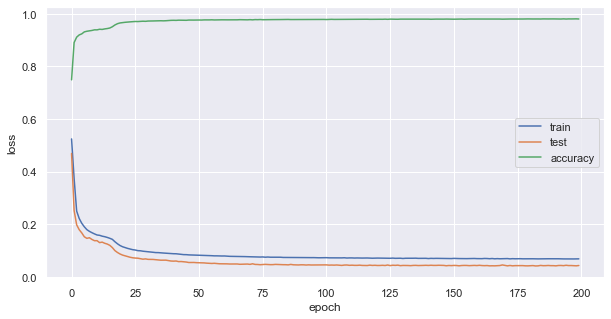

Best Epoch # 198 : Train:  0.0684225782752037  /  0.04285077311098576  /  0.9809420464425015


In [58]:
model = DefrostCNNLSTM(input_dim = len(input_cols), lstm_input_dim = 5, lstm_hidden_dim = 20, output_dim=2, num_layers=2, lstm_dropout = 0.2)

criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_5x5cnn+20x2xlstm_do+lin+do.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)

Model:  DefrostCNNLSTM(
  (conv): Conv1d(5, 5, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=replicate)
  (lstm): LSTM(5, 20, num_layers=3, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=20, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Epoch # 1 : Train:  0.5080021488738348  /  0.37795440832773847  /  0.8079278563909774
Epoch # 2 : Train:  0.287098776997931  /  0.1613540201385816  /  0.9309802206019643
Epoch # 3 : Train:  0.17397128548248705  /  0.1311954500277837  /  0.9405257212919611
Epoch # 4 : Train:  0.15315826421222054  /  0.11668742030858993  /  0.9469199507358204
Epoch # 5 : Train:  0.13959419826068073  /  0.1047209008038044  /  0.951893701858878
Epoch # 6 : Train:  0.13084187621183424  /  0.0967956766486168  /  0.9560016088166226
Epoch # 7 : Train:  0.12321712368403573  /  0.08904255717992783  /  0.9606456864460736
Epoch # 8 : Train:  0.11617501950766666  /  0.079682224492232  /  0.9660237017237453
Epoch # 9 : Train:  0.11

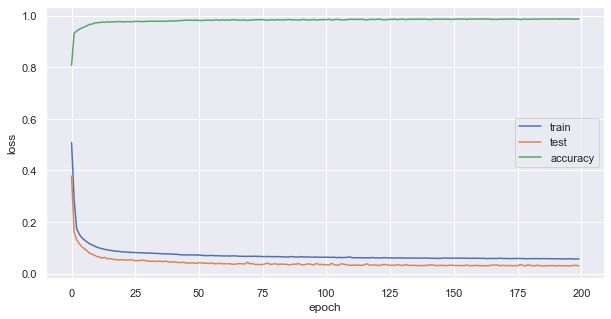

Best Epoch # 191 : Train:  0.057868885269096816  /  0.029906917090217273  /  0.9875061620389508


In [63]:
model = DefrostCNNLSTM(input_dim = len(input_cols), lstm_input_dim = 5, hidden_dim = 20, output_dim=2, num_layers=3, lstm_dropout = 0.2)

criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_5x5cnn+20x3xlstm_do+lin+do.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)

Model:  DefrostCNNLSTM(
  (conv): Conv1d(5, 5, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=replicate)
  (lstm): LSTM(5, 30, num_layers=3, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=30, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Epoch # 1 : Train:  0.5462954019207552  /  0.4973405639330546  /  0.7450216379647288
Epoch # 2 : Train:  0.4734867676553956  /  0.4234521222114563  /  0.7945107422325297
Epoch # 3 : Train:  0.2546843644007143  /  0.13921769072612128  /  0.9370795613476348
Epoch # 4 : Train:  0.14724710891135487  /  0.1082627895474434  /  0.9523124100909305
Epoch # 5 : Train:  0.13008374633289962  /  0.0960089565316836  /  0.957778172253553
Epoch # 6 : Train:  0.12052135602627174  /  0.09027588590979577  /  0.9604128499012586
Epoch # 7 : Train:  0.1132782544850944  /  0.08000444610913594  /  0.9644591609089576
Epoch # 8 : Train:  0.10815084754792323  /  0.07524071936806043  /  0.9671286446037876
Epoch # 9 : Train:  0.1

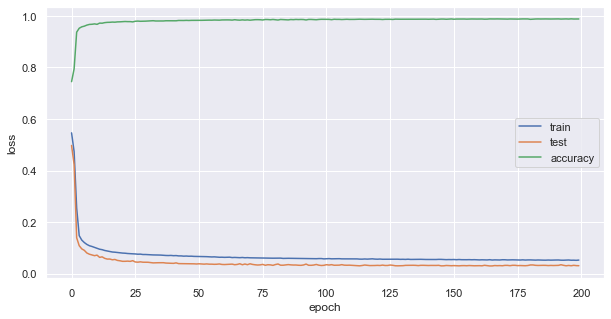

Best Epoch # 197 : Train:  0.051863580212804926  /  0.030479582734405996  /  0.9887585506848682


In [64]:

# 41 th iteration: Train:  0.06673434061795167  /  0.039324409990962365  /  0.9831399403037292
#model = DefrostCNNLSTM(input_dim = len(input_cols), hidden_dim = 20, output_dim=2, num_layers=3)

# Binary column
# Non-defrost data: 0.9
# 55 th iteration: Train:  0.055689891774088784  /  0.02792315572349829  /  0.9890986605612097
#model = DefrostCNNLSTM(input_dim = len(input_cols), hidden_dim = 20, output_dim=2, num_layers=3)

# Non-defrost data: 0.8
# 114 th iteration: Train:  0.05283756726303412  /  0.0216967448545772  /  0.9914627387967455
#model = DefrostCNNLSTM(input_dim = len(input_cols), hidden_dim = 20, output_dim=2, num_layers=3)

# 103 th iteration: Train:  0.05422530195223724  /  0.02955060472656826  /  0.9892201965116426
#model = DefrostCNNLSTM(input_dim = len(input_cols), hidden_dim = 30, output_dim=2, num_layers=3)

model = DefrostCNNLSTM(input_dim = len(input_cols), lstm_input_dim = 5, hidden_dim = 30, output_dim=2, num_layers=3, lstm_dropout = 0.2)

criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_5x5cnn+30x3xlstm_do+lin+do.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)


Model:  DefrostCNNLSTM(
  (conv): Conv1d(5, 10, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=replicate)
  (lstm): LSTM(10, 30, num_layers=3, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=30, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Epoch # 1 : Train:  0.3931224649570074  /  0.2379157104094823  /  0.8973198587153591
Epoch # 2 : Train:  0.22049925070121346  /  0.16199380815029144  /  0.9265093188894789
Epoch # 3 : Train:  0.1731676726366382  /  0.12187590171893438  /  0.9474040391386973
Epoch # 4 : Train:  0.1266178413327918  /  0.07458117504914602  /  0.970331471076398
Epoch # 5 : Train:  0.0979237267859729  /  0.057169058372577033  /  0.9775433486457173
Epoch # 6 : Train:  0.08452806533145976  /  0.04825861550867558  /  0.9808077739019352
Epoch # 7 : Train:  0.0760492295677583  /  0.03859018087387085  /  0.9844422055597055
Epoch # 8 : Train:  0.06952091383871185  /  0.03371457666158676  /  0.9869315767801268
Epoch # 9 : Train:

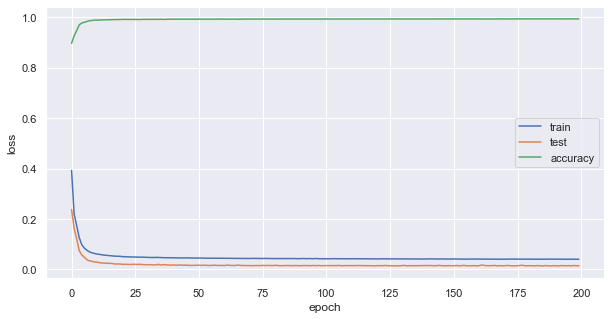

Best Epoch # 189 : Train:  0.040377961028457046  /  0.013691835658003887  /  0.9942651912159389


In [73]:
model = DefrostCNNLSTM(input_dim = len(input_cols), lstm_input_dim = 10, lstm_hidden_dim = 30, output_dim=2, num_layers=3, lstm_dropout = 0.2)

criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer, picfile='./gen/train_5x10cnn+30x3xlstm_do+lin+do.png')
trainer.train(train_dataloader, test_dataloader, epochs = 200)

Re-Test the last network with a 1 min chunk overlap...

In [ ]:
dist_seq_min2 = 1

train_dataset2 = HeatpumpDataset(normalized_df, input_cols, len_seq_min, len_future_min, dist_seq_min2, max_samples = 0, sample_filter = filter_normal10, date_filter = filter_train)
print("Train dataset: ", len(train_dataset2))

test_dataset2 = HeatpumpDataset(normalized_df, input_cols, len_seq_min, len_future_min, dist_seq_min2, max_samples = 0, sample_filter = filter_normal10, date_filter = filter_test)
print("Test dataset: ", len(test_dataset2))

In [ ]:
defrost_num2 = 0

for i in range(len(train_dataset2)):
    defrost_num2 += train_dataset2[i][1][-1].item() # last timestep holds logit for sample_y (1 == defrosting)

print("Training samples with defrosting: ", defrost_num2, " (", defrost_num2/len(train_dataset2), ")")

train_weights2 = [defrost_num2 / len(train_dataset2), 1-(defrost_num2 / len(train_dataset2))]

print("Weights: ", train_weights2)

In [ ]:
class DefrostMultiCNNLSTM(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim=2, num_layers=2):
        super(DefrostMultiCNNLSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # NN layers
        # input -> 2 * CNN + Relu -> LSTM+Dropout -> Linear -> Dropout -> output
        
        self.conv1 = nn.Conv1d(self.input_dim, self.input_dim, kernel_size=5, padding=2, padding_mode = 'replicate')
        self.conv2 = nn.Conv1d(self.input_dim, self.input_dim, kernel_size=5, padding=2, padding_mode = 'replicate')
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers, dropout = 0.2, batch_first = True)
        self.linear = nn.Linear(self.hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.2)

    def forward(self, input):
        # input: [batch_size, seq_len, input_dim]

        input = input.reshape(-1, self.input_dim, input.size(1)) # [batch_size, input_dim, seq_len]
#        print("input.reshape: ", input.shape)
        # Forward pass through first CNN layer

        # Syntax: output, (hidden, cell) = lstm(input, (hidden, cell))
        cnn_out = F.relu(self.conv1(input)) #  -> [batch_size, seq_len, hidden_dim], (hidden, cell)
#        print("cnn_out: ", cnn_out.shape)

        # Forward pass through second CNN layer

        cnn_out = F.relu(self.conv2(input)) #  -> [batch_size, seq_len, hidden_dim], (hidden, cell)

        # Forward pass through LSTM layer

        lstm_in = cnn_out.reshape(-1, cnn_out.size(2), self.input_dim) # [batch_size, seq_len, input_dim]
#        print("lstm_in: ", lstm_in.shape)

        # Syntax: output, (hidden, cell) = lstm(input, (hidden, cell))
        lstm_out, self.hidden = self.lstm(lstm_in) #  -> [batch_size, seq_len, hidden_dim], (hidden, cell)

        # Forward pass through linear layer

        lstm_out = lstm_out.reshape(-1, self.hidden_dim) # [batch_size * seq_len, hidden_dim]
        y_pred = self.linear(lstm_out) # [batch_size * seq_len, output_dim]

        # Forward pass through dropout layer

        y_pred = self.dropout(y_pred) # [batch_size * seq_len, output_dim]
        return y_pred

In [70]:

# Binary column
# Non-defrost data: 0.9

# LR: 0.0001
# 192 th iteration: Train:  0.0572605140937899  /  0.030663486928611126  /  0.9878682280675677
#model = DefrostMultiCNNLSTM(input_dim = len(input_cols), hidden_dim = 20, output_dim=2, num_layers=3)

# LR: 0.001
model = DefrostMultiCNNLSTM(input_dim = len(input_cols), hidden_dim = 20, output_dim=2, num_layers=3)

# optimizer , loss
#criterion = torch.nn.MSELoss()
#criterion = torch.nn.BCEWithLogitsLoss()
#criterion = torch.nn.BCELoss()
criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.001, alpha = 0.99, momentum = 0.9)

trainer = Trainer(model, criterion, optimizer)
trainer.train(train_dataloader, test_dataloader, epochs = 200)

Model:  DefrostMultiCNNLSTM(
  (conv1): Conv1d(5, 5, kernel_size=(5,), stride=(1,), padding=(2,), padding_mode=replicate)
  (conv2): Conv1d(5, 5, kernel_size=(3,), stride=(1,), padding=(1,), padding_mode=replicate)
  (lstm): LSTM(5, 20, num_layers=3, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=20, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
0 th iteration: Train:  0.2920034946188615  /  0.12330313041395655  /  0.9473949677402532
1 th iteration: Train:  0.12120249756072086  /  0.07713012257817306  /  0.9593021993893823
2 th iteration: Train:  0.09901107291144683  /  0.06893855902084076  /  0.9644462075237232
3 th iteration: Train:  0.09319798432293454  /  0.06281472922935237  /  0.9676045242245019
4 th iteration: Train:  0.08866200084211112  /  0.05598968468346849  /  0.9714712483963583
5 th iteration: Train:  0.08459637389921085  /  0.05338148956792354  /  0.9724565505188232
6 th iteration: Train:  0.0813323552330536  /  0.05099029385000225

KeyboardInterrupt: 

In [215]:
class DefrostEncoder(nn.Module):
    def __init__(self, seq_len, n_features = 3, embedding_dim=60):
        super(DefrostEncoder, self).__init__()
        
        self.seq_len = seq_len
        self.n_features = n_features
        self.embedding_dim = embedding_dim
        self.hidden_dim = 2 * embedding_dim
        print("DefrostEncoder.__init__ seq_len=", self.seq_len)
        print("DefrostEncoder.__init__ n_features=", self.n_features)
        print("DefrostEncoder.__init__ embedding_dim=", self.embedding_dim)
        self.lstm1 = nn.LSTM(input_size=n_features, hidden_size=self.hidden_dim, num_layers=1, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=self.hidden_dim, hidden_size=self.embedding_dim*self.n_features, num_layers=1, batch_first=True)

    # input: batch, seq_len, input_size
    def forward(self, input):
        # input: [batch_size, seq_len, n_features]

        print("Encoder.Input: ", input.shape)
#        input = input.reshape(self.seq_len, -1, self.n_features) #  [seq_len, batch_size, n_features]

#        print("Encoder.InputReshape: ", input.shape)

        # Syntax: output, (hidden, cell) = lstm(input, (hidden, cell))
        input2, (_, _) = self.lstm1(input)  #  input2: [batch_size, seq_len, hidden_dim]
        print("Encoder.Input2: ", input2.shape)

        # Syntax: output, (hidden, cell) = lstm(input, (hidden, cell))
        output, (hidden, _) = self.lstm2(input2) #  hidden: [n_features, batch_size, embedding_dim]
        # output: seq_len, batch, num_directions * hidden_size
        # hidden: num_layers * num_directions, batch, hidden_size

        print("Encoder.outputLstm2: ", output.shape)
        print("Encoder.hidden: ", hidden.shape)
        output = hidden.reshape((self.n_features, -1, self.embedding_dim))

        print("Encoder.output: ", output.shape)

        return output

#Encoder.Input:  torch.Size([32, 115, 5])
#Encoder.Input2:  torch.Size([32, 115, 60])
#Encoder.outputLstm2:  torch.Size([32, 115, 150])
#Encoder.hidden:  torch.Size([1, 32, 150])
#Encoder.output:  torch.Size([5, 32, 30])
#Decoder.Input:  torch.Size([5, 32, 30])
#Decoder.InputRepeat:  torch.Size([575, 32, 150])
#RuntimeError: shape '[5, 115, 30]' is invalid for input of size 2760000

class DefrostDecoder(nn.Module):
    def __init__(self, seq_len, embedding_dim=60, n_features=3):
        super(DefrostDecoder, self).__init__()

        self.seq_len = seq_len
        self.embedding_dim = embedding_dim
        self.hidden_dim = 2 * embedding_dim
        self.n_features = n_features

        self.lstm1 = nn.LSTM(input_size=embedding_dim, hidden_size=self.embedding_dim*self.n_features, num_layers=1, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=embedding_dim, hidden_size=self.hidden_dim, num_layers=1, batch_first=True)

        self.output_layer = nn.Linear(self.hidden_dim, n_features)

    def forward(self, input):
        # input: [batch_size, embedding_dim, input_dim]
        
        print("Decoder.Input: ", input.shape)
        input = input.repeat(self.seq_len, 1, self.n_features)

        print("Decoder.InputRepeat: ", input.shape)
        input = input.reshape((self.n_features, self.seq_len, self.embedding_dim))

        print("Decoder.InputReshape: ", input.shape)
        input2, (hidden_n, cell_n) = self.lstm1(input)
        print("Decoder.Input2: ", input2.shape)
        output, (hidden_n, cell_n) = self.lstm2(input2)
        print("Decoder.Output: ", output.shape)
        output = output.reshape((self.seq_len, self.hidden_dim))
        print("Decoder.OutputReshape: ", output.shape)
        return self.output_layer(x)

class DefrostRecurrentAutoencoder(nn.Module):
    def __init__(self, seq_len, n_features=3, embedding_dim=60):
        super(DefrostRecurrentAutoencoder, self).__init__()
        self.encoder = DefrostEncoder(seq_len, n_features, embedding_dim)
        self.decoder = DefrostDecoder(seq_len, embedding_dim, n_features)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [216]:

model = DefrostRecurrentAutoencoder(len_seq_min - len_future_min, n_features=len(input_cols), embedding_dim=30)

# optimizer , loss
criterion = nn.L1Loss(reduction='sum')
optimizer = optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

trainer = Trainer(model, criterion, optimizer)
trainer.train(train_dataloader, test_dataloader, epochs = 1000)

DefrostEncoder.__init__ seq_len= 115
DefrostEncoder.__init__ n_features= 5
DefrostEncoder.__init__ embedding_dim= 30
Model:  DefrostRecurrentAutoencoder(
  (encoder): DefrostEncoder(
    (lstm1): LSTM(5, 60, batch_first=True)
    (lstm2): LSTM(60, 150, batch_first=True)
  )
  (decoder): DefrostDecoder(
    (lstm1): LSTM(30, 150, batch_first=True)
    (lstm2): LSTM(30, 60, batch_first=True)
    (output_layer): Linear(in_features=60, out_features=5, bias=True)
  )
)
Encoder.Input:  torch.Size([32, 115, 5])
Encoder.Input2:  torch.Size([32, 115, 60])
Encoder.outputLstm2:  torch.Size([32, 115, 150])
Encoder.hidden:  torch.Size([1, 32, 150])
Encoder.output:  torch.Size([5, 32, 30])
Decoder.Input:  torch.Size([5, 32, 30])
Decoder.InputRepeat:  torch.Size([575, 32, 150])


RuntimeError: shape '[5, 115, 30]' is invalid for input of size 2760000

In [253]:
0.05283756726303412  /  0.0216967448545772  /  0.9914627387967455
torch.save(model.state_dict(), './defrost_cnnlstm_full_0.0528_0.02169_0.9914.pt')


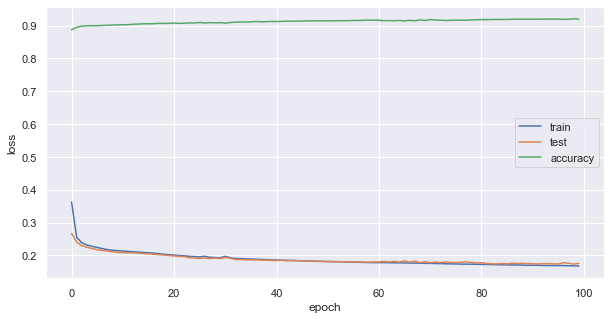

In [131]:
sns.set(rc={'figure.figsize':(10, 5)})
#plt.plot(np.linspace(1, i, i), train_hist[:i], label='train')
#plt.plot(np.linspace(1, i, i), test_hist[:i], label='test')
plt.plot(trainer.train_hist, label='train')
plt.plot(trainer.test_hist, label='test')
plt.plot(trainer.accuracy_hist, label='accuracy')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.gcf().savefig('./gen/train_20x1xlstm+lin.png')
plt.show()

In [1]:
print("Searching wrong predictions (", len(test_dataset),")")

for i in range(len(test_dataset)):
    sample = test_dataset[i]
    sample_x = sample[0]
    sample_y = sample[1]

    sample_x = torch.tensor(sample_x)
    y_pred = trainer.test_batch(torch.unsqueeze(sample_x, 0))
    defrost_pred_logits = y_pred[-1]

    _, defrost_pred = torch.max(defrost_pred_logits, 0)

    print("#", i, "test / pred: ", sample_y[-1].item(), " / ", defrost_pred.item())
#        print("defrost_pred: ", defrost_pred.item())

    if (sample_y[-1].item() > 0.0) & (defrost_pred.item() == 0.0):
#        print("defrost: ", sample[1][-1].item())
#        print("defrost_pred: ", defrost_pred.item())
        print("#", i, "Defrost not predicted!")
        plt.plot(sample_x, label='Sample #{}'.format(i))
        plt.legend()
        plt.show()
    elif (sample_y[-1].item() == 0.0) & (defrost_pred.item() > 0.0):
#        print("defrost: ", sample[1][-1].item())
#        print("defrost_pred: ", defrost_pred.item())
        print("#", i, "Defrost falsely predicted!")
        plt.plot(sample_x, label='Sample #{}'.format(i))
        plt.legend()
        plt.show()

NameError: name 'test_dataset' is not defined

In [99]:
sample = test_dataset[220]

print("Sample: ", sample[1])

print("Sample end: ", sample[1][-1])

sample_x = sample[0]
sample_y = sample[1]

sample_x = torch.tensor(sample_x)

y_pred = trainer.test_batch(torch.unsqueeze(sample_x, 0))
defrost_pred_logits = y_pred[-1]

_, defrost_pred = torch.max(defrost_pred_logits, 0)

print("defrost: ", sample_y[-1].item())
print("defrost_pred: ", defrost_pred.item())


Sample:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
Sample end:  tensor(1)
defrost:  1
defrost_pred:  1


In [951]:

total = 0
correct = 0

model.eval()
for j,batch in enumerate(test_dataloader):
    x_test = batch[0]
    y_test = batch[1]

    y_pred = model(x_test)
#    print(x_test)
#    print("y_test: ", y_test)
#    print("y_pred: ", y_pred)
#    print("torch.reshape(y_test, (-1,)): ", torch.reshape(y_test, (-1,)))
#    print("torch.reshape(y_test, (-1,)).shape: ", torch.reshape(y_test, (-1,)).shape)

    loss = criterion(y_pred, torch.reshape(y_test, (-1,)))
#    print("y_pred.data: ", y_pred.data.shape)
    

#    _, predicted = torch.max(y_pred.data, 1)
#
##    print("y_pred.reshape: ", torch.reshape(y_pred, (batch_size, -1, 2)).shape)
##    y_pred = torch.reshape(y_pred, (batch_size, -1, 2))
#
##    print("y_pred.lastTS: ", y_pred[:, -1, :])
#
##    print("predicted: ", predicted)
##    print("y_test: ", y_test.shape)
##    print("y_test.reshape: ", y_test.reshape(-1))
#    match = (predicted == y_test.reshape(-1))
# #   print("Match: ", match)
#    y_test_weighted = y_test.reshape(-1).double()
#    y_test_weighted[y_test_weighted==1] = train_weights[1] # fill in weights for label "defrosting"
#    y_test_weighted[y_test_weighted==0] = train_weights[0] # fill in weights for label "normal"
##    print("y_test_weighted: ", y_test_weighted)
#    match_weighted = y_test_weighted * match
##    print("match_weighted: ", match_weighted)
#    print("y_test_weighted.sum: ", y_test_weighted.sum())
#    print("match_weighted.sum: ", match_weighted.sum())
#    print("batch_accuracy: ", batch_accuracy(y_pred.data, y_test.reshape(-1)))
##    print("correct_weighted: ", (match_weighted.sum()/y_test_weighted.sum()))
##    total += (y_test.size(0) * y_test.size(1))
##    correct += match.sum().item()
    match_weighted, target_weighted = batch_accuracy(y_pred.data, y_test.reshape(-1))
    total += target_weighted
    correct += match_weighted

#    total += y_test_weighted.sum().item()
#    correct += match_weighted.sum().item()
#    print("Loss: ", loss)
#    print("Correct: ", correct)
#    print("Total: ", total)
    if j > 50:
        break
print('Accuracy: %d %%' % (100 * correct / total))

#    if j == max_training_batches - 1:
#        break
#inp.size(0)
#

Accuracy: 85 %


In [284]:
i

662

In [347]:
test_m = nn.Sigmoid()
test_loss = nn.BCELoss()
test_input = torch.randn(3, requires_grad=True)
test_target = torch.empty(3).random_(2)
test_output = test_loss(test_m(test_input), test_target)
test_output.backward()


In [348]:
test_target

tensor([0., 1., 0.])

In [ ]:
class trainer:
    def __init__(self,loss_fn,model,optimizer,scheduler,epochs):
        self.loss_fn = loss_fn
        self.model = model
        self.optimizer = optimizer
        self.scheduler = scheduler
        self.config = config

        
    def batch_train(self, batch_imgs, batch_labels0,batch_labels1, batch_idx):
        batch_imgs, batch_labels0,batch_labels1 = batch_imgs.cuda().float(), batch_labels0.cuda().float(),batch_labels1.cuda().float()
        predicted = self.model(batch_imgs)
        loss1 = self.loss_fn(predicted[0].float().reshape(-1), batch_labels0.reshape(-1))
        loss2 = self.loss_fn(predicted[1].float().reshape(-1), batch_labels1.reshape(-1))
        loss = loss1+loss2
        loss = loss/2.0
        loss.backward()
        self.optimizer.step()
        self.optimizer.zero_grad()
        return loss.item(), predicted
    
    def batch_valid(self, batch_imgs,get_fet):
        self.model.eval()
        batch_imgs = batch_imgs.cuda()
        with torch.no_grad():
            predicted = self.model(batch_imgs)
            predicted[0] = torch.sigmoid(predicted[0])
            predicted[1] = torch.sigmoid(predicted[1])
        return predicted
    
    def train_epoch(self, loader):
        self.model.train()
        tqdm_loader = tqdm(loader)
        current_loss_mean = 0
        for batch_idx, (imgs,labels,labels1) in enumerate(tqdm_loader):
            loss, predicted = self.batch_train(imgs[0], labels,labels1, batch_idx)
            current_loss_mean = (current_loss_mean * batch_idx + loss) / (batch_idx + 1)
            tqdm_loader.set_description('loss: {:.4} lr:{:.6}'.format(
                    current_loss_mean, self.optimizer.param_groups[0]['lr']))
            self.scheduler.step(batch_idx)
            if batch_idx>10:
                break
        return current_loss_mean
    
    def valid_epoch(self, loader,name="valid"):
        self.model.eval()
        tqdm_loader = tqdm(loader)
        current_loss_mean = 0
        correct = 0
        for batch_idx, (imgs,labels0,labels1) in enumerate(tqdm_loader):
            with torch.no_grad():
                batch_imgs = imgs.cuda().float()[0]
                batch_labels0 = labels0.cuda().float()
                batch_labels1 = labels1.cuda().float()
                predicted = self.model(batch_imgs)
                loss0 = self.loss_fn(predicted[0].float().reshape(-1),batch_labels0.float().reshape(-1)).item()
                loss1 = self.loss_fn(predicted[1].float().reshape(-1),batch_labels1.float().reshape(-1)).item()
                loss = loss0 + loss1
                loss = loss/2.0
                current_loss_mean = (current_loss_mean * batch_idx + loss) / (batch_idx + 1)
                tqdm_loader.set_description(f"loss : {current_loss_mean:.4}")
            if batch_idx>10:
                break
        score = 1-current_loss_mean
        print('metric {}'.format(score))
        return score
    
    def run(self, train_dataloader, test_dataloader):
        best_score = -100000
        for e in range(self.config.epochs):
            print("----------Epoch {}-----------".format(e))
            current_loss_mean = self.train_epoch(train_loder)
            score = self.valid_epoch(val_loder)
            if best_score < score:
                best_score = score
                torch.save(self.model.state_dict(),self.config.MODEL_PATH+"/{}_best.pth".format(self.config.model_name))

    def batch_valid_tta(self, batch_imgs):
        batch_imgs = batch_imgs.cuda()
        predicted = model(batch_imgs)
        tta_flip = [[-1],[-2]]
        for axis in tta_flip:
            predicted += torch.flip(model(torch.flip(batch_imgs, axis)), axis)
        predicted = predicted/(1+len(tta_flip))
        predicted = torch.sigmoid(predicted)
        return predicted.cpu().numpy()
            
    def load_best_model(self):
        if os.path.exists(self.config.MODEL_PATH+"/{}_best.pth".format(self.config.model_name)):
            self.model.load_state_dict(torch.load(self.config.MODEL_PATH+"/{}_best.pth".format(self.config.model_name)))
            print("load best model")
        
    def predict(self,imgs_tensor,get_fet = False):
        self.model.eval()
        with torch.no_grad():
            return self.batch_valid(imgs_tensor,get_fet=get_fet)

In [241]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt


class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(30, 20)
        self.lrelu1 = nn.LeakyReLU()
        self.lin2 = nn.Linear(20, 9)
        self.lrelu2 = nn.LeakyReLU()
        self.act = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.lin1(x)
        x = self.lrelu1(x)
        x = self.lin2(x)
        x = self.lrelu2(x)
        x = x.reshape(3, 3)
        return self.act(x)
            

model = SimpleModel()            
x = torch.randn(1, 30)
y = torch.tensor([[1., 0., 0.],
                  [0., 1., 0.],
                  [0., 0., 1.]])

#criterion = nn.BCEWithLogitsLoss()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
epochs = 40000

loss_history = []
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss_history.append(loss)
    loss.backward()
    optimizer.step()
    print(epoch, ': Loss: {:.3f}'.format(loss.item()))
    
print("target: {}".format(y))
print("output: {}".format(output))

plt.plot(np.linspace(1, epochs, epochs), loss_history)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()


20249 : Loss: 0.002
20250 : Loss: 0.002
20251 : Loss: 0.002
20252 : Loss: 0.002
20253 : Loss: 0.002
20254 : Loss: 0.002
20255 : Loss: 0.002
20256 : Loss: 0.002
20257 : Loss: 0.002
20258 : Loss: 0.002
20259 : Loss: 0.002
20260 : Loss: 0.002
20261 : Loss: 0.002
20262 : Loss: 0.002
20263 : Loss: 0.002
20264 : Loss: 0.002
20265 : Loss: 0.002
20266 : Loss: 0.002
20267 : Loss: 0.002
20268 : Loss: 0.002
20269 : Loss: 0.002
20270 : Loss: 0.002
20271 : Loss: 0.002
20272 : Loss: 0.002
20273 : Loss: 0.002
20274 : Loss: 0.002
20275 : Loss: 0.002
20276 : Loss: 0.002
20277 : Loss: 0.002
20278 : Loss: 0.002
20279 : Loss: 0.002
20280 : Loss: 0.002
20281 : Loss: 0.002
20282 : Loss: 0.002
20283 : Loss: 0.002
20284 : Loss: 0.002
20285 : Loss: 0.002
20286 : Loss: 0.002
20287 : Loss: 0.002
20288 : Loss: 0.002
20289 : Loss: 0.002
20290 : Loss: 0.002
20291 : Loss: 0.002
20292 : Loss: 0.002
20293 : Loss: 0.002
20294 : Loss: 0.002
20295 : Loss: 0.002
20296 : Loss: 0.002
20297 : Loss: 0.002
20298 : Loss: 0.002

KeyboardInterrupt: 

In [ ]:
display(normalized_df)
normalized_df.index.array[-1]
#normalized_df.iat[0,0]

In [17]:
### KANN ERSTMAL IGNORIERT WERDEN!!

def extract_window(df, time1, time2):
    #window = df[(df.index >= time1) & (df.index <= time2)].sparse.to_dense()
    window = df[time1 : time2].sparse.to_dense()
    idx_window = df.index.get_loc(window.iloc[0].name)
    for column in df.columns:
#        print("### First Val: {}".format(window[column].iloc[0]))
        if pd.isna(window[column].iloc[0]):
            for i in range(idx_window, -1, -1):
                lastValue = df[column].iloc[i]

                if not pd.isna(lastValue):
#                    print("### lastValue {}".format(lastValue))
                    break;
            window[column].iloc[0] = lastValue
    return window

win = extract_window(merged_df, '2020-12-10 12:00:00', '2020-12-10 15:00:00')
display(win)

outside  return  reference_return  supply  \
time                                                             
2020-12-10 12:00:08     10.6    25.6              40.0    29.9   
2020-12-10 12:00:18      NaN     NaN               NaN     NaN   
2020-12-10 12:00:28     10.5     NaN               NaN     NaN   
2020-12-10 12:00:38      NaN     NaN               NaN    30.0   
2020-12-10 12:00:48     10.6     NaN               NaN     NaN   
...                      ...     ...               ...     ...   
2020-12-10 14:59:27     10.6     NaN               NaN     NaN   
2020-12-10 14:59:28      NaN     NaN               NaN     NaN   
2020-12-10 14:59:38      NaN     NaN               NaN     NaN   
2020-12-10 14:59:48      NaN     NaN               NaN     NaN   
2020-12-10 14:59:58     10.5     NaN               NaN    24.2   

                     servicewater_reference  servicewater  return_external  \
time                                                                         
2020-12-10 12:00:08                    43.0          40.9             29.8   
2020-12-10 12:00:18                     NaN           NaN              NaN   
2020-12-10 12:00:28                     NaN           NaN              NaN   
2020-12-10 12:00:38                     NaN           NaN              NaN   
2020-12-10 12:00:48                     NaN           NaN              NaN   
...                                     ...           ...              ...   
2020-12-10 14:59:27                     NaN           NaN              NaN   
2020-12-10 14:59:28                     NaN           NaN              NaN   
2020-12-10 14:59:38                     NaN           NaN              NaN   
2020-12-10 14:59:48                     NaN           NaN              NaN   
2020-12-10 14:59:58                     NaN           NaN              NaN   

                     hot_gas  probe_in   mk1  starts_compressor1  \
time                                                               
2020-12-10 12:00:08     57.5       2.1  29.3              3727.0   
2020-12-10 12:00:18      NaN       NaN   NaN                 NaN   
2020-12-10 12:00:28      NaN       2.0  29.4                 NaN   
2020-12-10 12:00:38      NaN       NaN   NaN                 NaN   
2020-12-10 12:00:48      NaN       2.1   NaN                 NaN   
...                      ...       ...   ...                 ...   
2020-12-10 14:59:27      NaN       NaN   NaN                 NaN   
2020-12-10 14:59:28      NaN       NaN   NaN                 NaN   
2020-12-10 14:59:38      NaN       NaN   NaN                 NaN   
2020-12-10 14:59:48     20.6       NaN   NaN                 NaN   
2020-12-10 14:59:58      NaN       NaN   NaN                 NaN   

                     compressor_heating  defrosting  heatpump_heating  \
time                                                                    
2020-12-10 12:00:08                   0           0                 1   
2020-12-10 12:00:18                   0           0                 1   
2020-12-10 12:00:28                   0           0                 1   
2020-12-10 12:00:38                   0           0                 1   
2020-12-10 12:00:48                   0           0                 1   
...                                 ...         ...               ...   
2020-12-10 14:59:27                   0           0                 0   
2020-12-10 14:59:28                   0           0                 0   
2020-12-10 14:59:38                   0           0                 0   
2020-12-10 14:59:48                   0           0                 0   
2020-12-10 14:59:58                   0           0                 0   

                     heatpump_servicewater  heatpump_running  
time                                                          
2020-12-10 12:00:08                      0                 1  
2020-12-10 12:00:18                      0                 1  
2020-12-10 12:00:28                      0                 1

outside  return  reference_return  supply  \
time                                                             
2020-12-10 12:00:08     10.6    25.6              40.0    29.9   
2020-12-10 12:00:18      NaN     NaN               NaN     NaN   
2020-12-10 12:00:28     10.5     NaN               NaN     NaN   
2020-12-10 12:00:38      NaN     NaN               NaN    30.0   
2020-12-10 12:00:48     10.6     NaN               NaN     NaN   
...                      ...     ...               ...     ...   
2020-12-10 14:59:27     10.6     NaN               NaN     NaN   
2020-12-10 14:59:28      NaN     NaN               NaN     NaN   
2020-12-10 14:59:38      NaN     NaN               NaN     NaN   
2020-12-10 14:59:48      NaN     NaN               NaN     NaN   
2020-12-10 14:59:58     10.5     NaN               NaN    24.2   

                     servicewater_reference  servicewater  return_external  \
time                                                                         
2020-12-10 12:00:08                    43.0          40.9             29.8   
2020-12-10 12:00:18                     NaN           NaN              NaN   
2020-12-10 12:00:28                     NaN           NaN              NaN   
2020-12-10 12:00:38                     NaN           NaN              NaN   
2020-12-10 12:00:48                     NaN           NaN              NaN   
...                                     ...           ...              ...   
2020-12-10 14:59:27                     NaN           NaN              NaN   
2020-12-10 14:59:28                     NaN           NaN              NaN   
2020-12-10 14:59:38                     NaN           NaN              NaN   
2020-12-10 14:59:48                     NaN           NaN              NaN   
2020-12-10 14:59:58                     NaN           NaN              NaN   

                     hot_gas  probe_in   mk1  starts_compressor1  \
time                                                               
2020-12-10 12:00:08     57.5       2.1  29.3              3727.0   
2020-12-10 12:00:18      NaN       NaN   NaN                 NaN   
2020-12-10 12:00:28      NaN       2.0  29.4                 NaN   
2020-12-10 12:00:38      NaN       NaN   NaN                 NaN   
2020-12-10 12:00:48      NaN       2.1   NaN                 NaN   
...                      ...       ...   ...                 ...   
2020-12-10 14:59:27      NaN       NaN   NaN                 NaN   
2020-12-10 14:59:28      NaN       NaN   NaN                 NaN   
2020-12-10 14:59:38      NaN       NaN   NaN                 NaN   
2020-12-10 14:59:48     20.6       NaN   NaN                 NaN   
2020-12-10 14:59:58      NaN       NaN   NaN                 NaN   

                     compressor_heating  defrosting  heatpump_heating  \
time                                                                    
2020-12-10 12:00:08                   0           0                 1   
2020-12-10 12:00:18                   0           0                 1   
2020-12-10 12:00:28                   0           0                 1   
2020-12-10 12:00:38                   0           0                 1   
2020-12-10 12:00:48                   0           0                 1   
...                                 ...         ...               ...   
2020-12-10 14:59:27                   0           0                 0   
2020-12-10 14:59:28                   0           0                 0   
2020-12-10 14:59:38                   0           0                 0   
2020-12-10 14:59:48                   0           0                 0   
2020-12-10 14:59:58                   0           0                 0   

                     heatpump_servicewater  heatpump_running  
time                                                          
2020-12-10 12:00:08                      0                 1  
2020-12-10 12:00:18                      0                 1  
2020-12-10 12:00:28                      0                 1

outside     return  reference_return     supply  \
time                                                                     
2020-12-10 12:00:00  10.566667  25.600000              40.0  29.950000   
2020-12-10 12:01:00  10.600000  25.716667              40.0  30.016667   
2020-12-10 12:02:00  10.600000  25.800000              40.0  30.080000   
2020-12-10 12:03:00  10.566667  25.883333              40.0  30.233333   
2020-12-10 12:04:00  10.600000  25.957143              40.0  30.257143   
...                        ...        ...               ...        ...   
2020-12-10 14:55:00  10.600000  24.857143              15.0  24.085714   
2020-12-10 14:56:00  10.600000  24.400000              15.0  24.300000   
2020-12-10 14:57:00  10.600000  24.300000              15.0  24.185714   
2020-12-10 14:58:00  10.600000  24.300000              15.0  24.266667   
2020-12-10 14:59:00  10.571429  24.300000              15.0  24.285714   

                     servicewater_reference  servicewater  return_external  \
time                                                                         
2020-12-10 12:00:00                    43.0     40.900000             29.8   
2020-12-10 12:01:00                    43.0     40.900000             29.8   
2020-12-10 12:02:00                    43.0     40.900000             29.8   
2020-12-10 12:03:00                    43.0     40.900000             29.8   
2020-12-10 12:04:00                    43.0     40.900000             29.8   
...                                     ...           ...              ...   
2020-12-10 14:55:00                    43.0     43.100000             42.2   
2020-12-10 14:56:00                    43.0     43.100000             42.2   
2020-12-10 14:57:00                    43.0     43.100000             42.2   
2020-12-10 14:58:00                    43.0     43.083333             42.2   
2020-12-10 14:59:00                    43.0     43.100000             42.2   

                       hot_gas  probe_in        mk1  starts_compressor1  \
time                                                                      
2020-12-10 12:00:00  57.500000  2.066667  29.366667              3727.0   
2020-12-10 12:01:00  57.583333  2.116667  29.500000              3727.0   
2020-12-10 12:02:00  57.640000  2.340000  29.580000              3727.0   
2020-12-10 12:03:00  57.700000  2.500000  29.650000              3727.0   
2020-12-10 12:04:00  57.700000  2.500000  29.771429              3727.0   
...                        ...       ...        ...                 ...   
2020-12-10 14:55:00  21.028571  5.900000  25.500000              3727.0   
2020-12-10 14:56:00  21.116667  5.833333  24.916667              3727.0   
2020-12-10 14:57:00  20.914286  5.800000  24.628571              3727.0   
2020-12-10 14:58:00  20.783333  5.750000  24.550000              3727.0   
2020-12-10 14:59:00  20.671429  5.700000  24.500000              3727.0   

                     compressor_heating  defrosting  heatpump_heating  \
time                                                                    
2020-12-10 12:00:00                 0.0         0.0          1.000000   
2020-12-10 12:01:00                 0.0         0.0          1.000000   
2020-12-10 12:02:00                 0.0         0.0          1.000000   
2020-12-10 12:03:00                 0.0         0.0          1.000000   
2020-12-10 12:04:00                 0.0         0.0          0.857143   
...                                 ...         ...               ...   
2020-12-10 14:55:00                 0.0         0.0          0.000000   
2020-12-10 14:56:00                 0.0         0.0          0.000000   
2020-12-10 14:57:00                 0.0         0.0          0.000000   
2020-12-10 14:58:00                 0.0         0.0          0.000000   
2020-12-10 14:59:00                 0.0         0.0          0.000000   

                     heatpump_servicewater  heatpump_running  
time                                                    

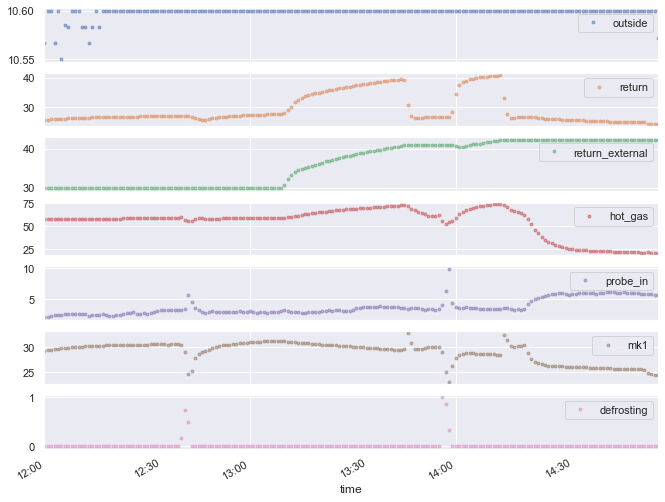

In [19]:
#merged_df.resample('1Min').mean()
display(win)
# todo: How to resample boolean columns to boolean?
win_resampled = win.ffill().resample('1Min').mean()
display(win_resampled)

sns.set(rc={'figure.figsize':(20, 8)})

cols_plot = ['outside', 'return', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'defrosting']
axes = win_resampled[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)


In [5]:
df_night = merged_df[merged_df.index.hour == 22]
print(df_night.groupby(by=[df_night.index.week])['hot_gas'].mean())
print(df_night.groupby(by=[df_night.index.week])['compressor_heating'].sum())



time
1     14.433574
2     15.800000
3     14.075399
4     15.525028
5     17.141829
6     14.537316
7     15.548469
8     15.317804
9     15.924297
10    16.616212
11    16.805267
12    17.097427
13    18.615747
14    19.477051
15    20.537031
16    20.374599
17    20.067411
18    21.521059
19    23.241848
20    22.583965
21    26.299360
22    26.805753
23    25.746602
24    26.052708
25    27.751928
26    28.099902
27    28.113965
28    27.284555
29    28.818042
30    29.028017
31    28.782789
32    27.727880
33    27.712985
34    27.895511
35    27.132382
36    24.837901
37    24.407562
38    23.862086
39    23.326798
40    20.134608
41    21.702313
42    20.926358
43    19.357206
44    18.276557
45    17.362019
46    17.124287
47    17.672892
48    14.656778
49    18.794903
50    17.470110
51    17.442094
52    16.304890
Name: hot_gas, dtype: float64
time
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8     16
9      0
10     0
11    10
12     0
13    18
14    29
15

In [61]:
df_defrosting = merged_df[merged_df['defrosting']==True]
#df_defrosting.groupby(by=[df_defrosting.index.month, df_defrosting.index.year])['defrosting'].sum()
df_defrosting.groupby(by=[df_defrosting.index.month])['hot_gas'].mean()

NotImplementedError: Sparse[float64, nan] dtype not supported

In [21]:
df_plot = merged_df[(merged_df.index > '2020-12-10 12:00:00') & (merged_df.index < '2020-12-10 15:00:00')]

In [16]:
df_plot

outside  return  reference_return  supply  \
time                                                             
2020-12-20 12:00:03     12.4    27.8              39.7    33.0   
2020-12-20 12:01:23     12.3    27.9              39.7    33.0   
2020-12-20 12:01:34     12.4    27.9              39.7    33.1   
2020-12-20 12:04:05     12.3    28.0              39.7    33.2   
2020-12-20 12:04:15     12.4    28.0              39.7    33.2   
...                      ...     ...               ...     ...   
2020-12-20 14:31:45     12.2    39.8              39.7    45.5   
2020-12-20 14:57:02     12.3    29.0              39.7    34.3   
2020-12-20 14:57:12     12.2    29.1              39.7    34.3   
2020-12-20 14:58:23     12.3    29.2              39.7    34.4   
2020-12-20 14:58:33     12.2    29.2              39.7    34.3   

                     servicewater_reference  servicewater  return_external  \
time                                                                         
2020-12-20 12:00:03                    44.0          40.0             28.6   
2020-12-20 12:01:23                    44.0          40.0             28.6   
2020-12-20 12:01:34                    44.0          40.0             28.6   
2020-12-20 12:04:05                    44.0          40.0             28.6   
2020-12-20 12:04:15                    44.0          40.0             28.6   
...                                     ...           ...              ...   
2020-12-20 14:31:45                    44.0          42.0             41.2   
2020-12-20 14:57:02                    44.0          44.1             43.0   
2020-12-20 14:57:12                    44.0          44.1             43.0   
2020-12-20 14:58:23                    44.0          44.1             43.0   
2020-12-20 14:58:33                    44.0          44.1             43.0   

                     hot_gas  probe_in   mk1  mk1_reference  \
time                                                          
2020-12-20 12:00:03     58.1      10.6  32.2            0.0   
2020-12-20 12:01:23     58.1      10.7  32.3            0.0   
2020-12-20 12:01:34     58.1      10.7  32.3            0.0   
2020-12-20 12:04:05     58.1      10.8  32.4            0.0   
2020-12-20 12:04:15     58.1      10.7  32.4            0.0   
...                      ...       ...   ...            ...   
2020-12-20 14:31:45     71.0      11.3  26.8            0.0   
2020-12-20 14:57:02     60.6      11.0  33.3            0.0   
2020-12-20 14:57:12     60.6      11.0  33.4            0.0   
2020-12-20 14:58:23     60.5      11.0  33.5            0.0   
2020-12-20 14:58:33     60.5      11.0  33.5            0.0   

                     starts_compressor1                       state  \
time                                                                  
2020-12-20 12:00:03                3737  Heatpump running: 01:03:26   
2020-12-20 12:01:23                3737  Heatpump running: 01:04:46   
2020-12-20 12:01:34                3737  Heatpump running: 01:04:55   
2020-12-20 12:04:05                3737  Heatpump running: 01:07:26   
2020-12-20 12:04:15                3737  Heatpump running: 01:07:36   
...                                 ...                         ...   
2020-12-20 14:31:45                3738  Heatpump running: 00:57:05   
2020-12-20 14:57:02                3738  Heatpump running: 01:22:11   
2020-12-20 14:57:12                3738  Heatpump running: 01:22:21   
2020-12-20 14:58:23                3738  Heatpump running: 01:23:31   
2020-12-20 14:58:33                3738  Heatpump running: 01:23:39   

                              extended_state  compressor_heating  defrosting  \
time                                                                           
2020-12-20 12:00:03        heating: 01:03:17               False       False   
2020-12-20 12:01:23        heating: 01:04:46               False       False   
2020-12-20 12:01:34        heating: 01:04:55               False       False   
202

In [61]:
left = pd.DataFrame({"a": [1, 5, 10], "left_val": ["a", "b", "c"]})
left.set_index('a', inplace=True)
display(left)
right = pd.DataFrame({"a": [1, 2, 3, 6, 7], "right_val": [1, 2, 3, 6, 7]})
right.set_index('a', inplace=True)
display(right)
#display(pd.merge_asof(left, right, on="a", allow_exact_matches=False))
dfm = left.merge(right, how='outer', left_index=True, right_index=True, )
dfm
# tolerance = 10)

left_val
a          
1         a
5         b
10        c

right_val
a           
1          1
2          2
3          3
6          6
7          7

right_val
a           
1          1
2          2
3          3
6          6
7          7

In [59]:
rng = pd.date_range("2014-1-1", periods=100, freq="D") + pd.Timedelta("1s")
ts = pd.Series(range(100), index=rng)
ts.resample("3T").sum()
#ts

2014-01-01 00:00:00     0
2014-01-01 00:03:00     0
2014-01-01 00:06:00     0
2014-01-01 00:09:00     0
2014-01-01 00:12:00     0
                       ..
2014-04-09 23:48:00     0
2014-04-09 23:51:00     0
2014-04-09 23:54:00     0
2014-04-09 23:57:00     0
2014-04-10 00:00:00    99
Freq: 3T, Length: 47521, dtype: int64